In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")

In [126]:
sepsis_df = pd.read_csv("SyntheticData_Training.csv") 
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
sepsis_df

studyid_adm  agecalc_adm  height_cm_adm  weight_kg_adm  muac_mm_adm  \
0               1         16.8          79.80         11.600        150.0   
1               2         46.1          93.00         13.600        151.0   
2               3          7.9          68.20          8.200        148.0   
3               4         38.2          95.00         12.000        138.0   
4               5         16.1          83.00         12.000        165.0   
5               6         29.6          84.00         10.000        138.0   
6               7         45.1         102.20         11.000        145.0   
7               8          6.7          65.00          7.800        160.0   
8               9         10.7          65.00          5.900        118.0   
9              10         32.3          83.10         11.640        161.0   
10             11         40.4          88.60         12.000        147.0   
11             12          9.1          70.00          8.700        150.0   
12             13          8.1          64.00          6.000        115.0   
13             14         21.3          79.00         10.100        148.0   
14             15          9.3          73.00          8.000        130.0   
15             16         39.0         100.50         14.000        145.0   
16             17         20.9          71.50          6.800        108.0   
17             18         38.8         108.20         18.000        156.0   
18             19         37.1          84.00         10.000        138.0   
19             20         11.2          72.60          7.050        115.0   
20             21         19.8          73.50          5.000        119.0   
21             22          6.0          66.00          3.780         94.0   
22             23         11.1          73.00          8.310        143.0   
23             24         17.6          79.00          9.000        141.0   
24             25          6.9          73.20          7.000        130.0   
25             26         12.4          78.60          8.100        136.0   
26             27          8.8          69.00          6.460        130.0   
27             28         35.3          86.00         11.000        132.0   
28             29         12.9          72.50          7.990        128.0   
29             30         17.5          84.40         10.000        137.0   
30             31         24.5          82.00         11.000        136.0   
31             32         41.2          98.00         14.000        142.0   
32             33         30.4          84.30         10.000        141.0   
33             34          7.7          71.50          8.850        147.0   
34             35         16.7          75.10          8.600        136.0   
35             36         46.9          96.10         14.000        140.0   
36             37          8.1          70.00          8.600        150.0   
37             38         14.9          78.90          9.500        142.0   
38             39         12.8          70.20          6.300        113.0   
39             40          9.5          76.00         10.000        163.0   
40             41         10.1          67.00          7.000        105.0   
41             42         28.9          92.00         11.500        129.0   
42             43         33.9          97.00         11.400        141.0   
43             44          8.4          68.00          8.900        159.0   
44             45         11.6          71.00          7.800        138.0   
45             46         34.4          91.40         12.000        145.0   
46             47         10.4          63.20          8.500        128.0   
47             48         13.2          80.00          9.200        142.0   
48             49         11.5          71.20          8.800        144.0   
49             50         16.2          64.00          3.600        114.0   
50             51         33.8         100.50         15.000        148.0   
51

In [7]:
sepsis_df.info()
pd.set_option('display.max_rows', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Columns: 138 entries, studyid_adm to inhospital_mortality
dtypes: float64(23), int64(3), object(112)
memory usage: 2.8+ MB


In [9]:
sepsis_df.duplicated().sum()

0

In [13]:
#Create a summary DataFrame of column characteristics

column_summary= pd.DataFrame({'Column': sepsis_df.columns, 
                              'Data Type': sepsis_df.dtypes.values,
                              'Missing Values': sepsis_df.isnull().sum().values,
                              'Missing %': (sepsis_df.isnull().mean() * 100).values,
                              'Unique Values': sepsis_df.nunique().values})



# Display all rows in the column summary
pd.set_option('display.max_rows', None)

# Print
print(column_summary)

                       Column Data Type  Missing Values  Missing %  \
0                 studyid_adm     int64               0   0.000000   
1                 agecalc_adm   float64               0   0.000000   
2               height_cm_adm   float64              14   0.521221   
3               weight_kg_adm   float64               9   0.335071   
4                 muac_mm_adm   float64              13   0.483991   
5                  hr_bpm_adm   float64               1   0.037230   
6             rr_brpm_app_adm   float64               5   0.186150   
7              sysbp_mmhg_adm   float64               2   0.074460   
8             diasbp_mmhg_adm   float64               1   0.037230   
9                  temp_c_adm   float64               1   0.037230   
10       spo2site1_pc_oxi_adm   float64               4   0.148920   
11       spo2site2_pc_oxi_adm   float64             205   7.632167   
12              spo2other_adm   float64            2505  93.261355   
13                 m

In [128]:
# Removing leading/trailing whitespace
sepsis_df.columns = sepsis_df.columns.str.strip()

# Define the intervention columns we want to drop
intervention_cols = [f"admitabx_adm___{i}" for i in range(1, 22)]

# Dropping them
sepsis_df.drop(columns=intervention_cols, inplace=True, errors='ignore')

# Confirming
print("Remaining columns:", sepsis_df.shape[1])
print("Dropped intervention columns:", intervention_cols)


Remaining columns: 117
Dropped intervention columns: ['admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20', 'admitabx_adm___21']


In [130]:
# Dropping unnecessary columns
sepsis_df = sepsis_df.drop(["spo2other_adm","lactate2_mmolpl_adm", "nonexclbreastfed_adm", 
                            "sqi2_perc_oxi_adm", "vaccmeaslessource_adm","vaccpneumocsource_adm"], axis=1)


In [41]:
# Create summary of all columns
column_summary = pd.DataFrame({
    'Column': sepsis_df.columns,
    'Data Type': sepsis_df.dtypes.values,
    'Missing Values': sepsis_df.isnull().sum().values,
    'Missing %': (sepsis_df.isnull().mean() * 100).values,
    'Unique Values': sepsis_df.nunique().values
})

# Filter to show only columns with missing values
missing_only = column_summary[column_summary['Missing Values'] > 0]

# Display all rows
pd.set_option('display.max_rows', None)

# Print the filtered summary
print(missing_only)

                       Column Data Type  Missing Values  Missing %  \
2               height_cm_adm   float64              14   0.521221   
3               weight_kg_adm   float64               9   0.335071   
4                 muac_mm_adm   float64              13   0.483991   
5                  hr_bpm_adm   float64               1   0.037230   
6             rr_brpm_app_adm   float64               5   0.186150   
7              sysbp_mmhg_adm   float64               2   0.074460   
8             diasbp_mmhg_adm   float64               1   0.037230   
9                  temp_c_adm   float64               1   0.037230   
10       spo2site1_pc_oxi_adm   float64               4   0.148920   
11       spo2site2_pc_oxi_adm   float64             205   7.632167   
12                 momage_adm   float64              19   0.707372   
13        momagefirstpreg_adm   float64             224   8.339538   
14          householdsize_adm   float64               3   0.111690   
15          alivechi

#### height_cm_adm

In [132]:
# Show relevant info where height is missing
sepsis_df.loc[sepsis_df['height_cm_adm'].isnull(), ['weight_kg_adm', 'agecalc_adm', 'sex_adm']]

weight_kg_adm  agecalc_adm sex_adm
370            13.0         23.3    Male
430             NaN         29.0    Male
858             NaN         30.1  Female
928             NaN         26.9    Male
956             5.8         22.0    Male
1025            NaN         15.5    Male
1178           13.0         52.2  Female
1360            NaN         21.2  Female
1785            9.0         22.5    Male
1855            9.0         10.6    Male
1887            NaN         55.7  Female
2336            8.5          8.4  Female
2353            NaN         18.9    Male
2356            NaN         22.0    Male

* To handle missing values in the height_cm_adm column, the approach involves imputing the missing heights using the WHO median height-for-age data. The patient's age in months is rounded to the nearest whole number to align with the WHO data, which includes median height values for different age months. The missing values in the height_cm_adm column are then filled with the corresponding median height from the WHO dataset based on the patient's rounded age.
  
* This method ensures that the imputed heights are age-appropriate and based on established growth standards, improving the overall quality of the dataset for analysis.

##### *For Female*

In [134]:
# Loading the WHO dataset for girls
who_girls = pd.read_csv("girls_length_height_for_age.csv")

In [136]:
# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean = who_girls[['Months', 'Median']].rename(columns={
    'Months': 'age_months_rounded',
    'Median': 'who_median_height'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean,
    on='age_months_rounded',
    how='left'
)

* The patient's age in months is rounded to the nearest whole number to align with the WHO data. The WHO median height-for-age data for girls is then cleaned and merged with the sepsis dataset based on the rounded age.

* This ensures that each patient is matched with the appropriate WHO median height based on their age.

In [138]:
# Identify missing heights for female patients
girls_mask = (sepsis_df['sex_adm'] == 'Female') & (sepsis_df['height_cm_adm'].isna())

# Impute with WHO median height based on rounded age
sepsis_df.loc[girls_mask, 'height_cm_adm'] = sepsis_df.loc[girls_mask, 'who_median_height']

* This code identifies missing height values for female patients by creating a mask where the sex_adm is 'Female' and height_cm_adm is null.

* Then, for these patients, the missing height values are imputed using the corresponding WHO median height based on the patient's rounded age in months.

##### *For Male*

In [140]:
# Loading the WHO dataset for boys
who_boys = pd.read_csv("boys_length_height_for_age.csv")

In [142]:
# Round age to match WHO months
sepsis_df['age_months_rounded'] = sepsis_df['agecalc_adm'].round().astype(int)

# Prepare WHO data
who_clean_boys = who_boys[['Months', 'Median']].rename(columns={
    'Months': 'age_months_rounded',
    'Median': 'who_median_height_boys'
})

# Merge on the rounded age
sepsis_df = sepsis_df.merge(
    who_clean_boys,
    on='age_months_rounded',
    how='left'
)

* In this process, the age calculation of the children in the sepsis dataset is rounded to the nearest whole month using the agecalc_adm column. This rounded age is stored in a new column age_months_rounded.

* Next, the WHO data for boys is prepared by extracting the relevant columns (Months and Median) from the who_boys dataset and renaming them to age_months_rounded and who_median_height_boys, ensuring consistency with the sepsis dataset.

* Finally, the two datasets are merged based on the rounded age (age_months_rounded), allowing the sepsis dataset to be enriched with the WHO median height for boys based on the rounded age, creating a column called who_median_height_boys in the sepsis_df.

In [146]:
# Identify missing heights for male patients
boys_mask = (sepsis_df['sex_adm'] == 'Male') & (sepsis_df['height_cm_adm'].isna())

# Impute with WHO median height based on rounded age for boys
sepsis_df.loc[boys_mask, 'height_cm_adm'] = sepsis_df.loc[boys_mask, 'who_median_height_boys']

# Check for missing values again
sepsis_df['height_cm_adm'].isna().sum()

0

* This process identifies missing height values (height_cm_adm) for male patients in the dataset.
* For those missing values, the heights are imputed using the WHO median height for boys based on the rounded age.
* After the imputation, the number of remaining missing height values is checked to confirm the success of the imputation of the **height_cm_adm** column.

#### bcseye_adm

* This below code investigates whether missing values in the bcseye_adm variable (Blantyre Coma Scale – Eye Response) are associated with the availability of related coma scale components, specifically:
                        
                        - bcsmotor_adm – Motor Response
                        - bcsverbal_adm – Verbal Response

In [45]:
# Identify rows where 'bcseye_adm' is missing
missing_eye = sepsis_df['bcseye_adm'].isna()

# Print the corresponding 'bcsmotor_adm' and 'bcsverbal_adm' values where 'bcseye_adm' is missing
print(sepsis_df[missing_eye][['bcsmotor_adm', 'bcsverbal_adm']])

                               bcsmotor_adm  \
1388  No response or inappropriate response   

                                          bcsverbal_adm  
1388  Cries appropriately with pain, or, if verbal, ...  


In [51]:
# Verifying the exact patient record
patient_1388 = sepsis_df.loc[1388, ['bcseye_adm', 'bcsmotor_adm', 'bcsverbal_adm']]
print(patient_1388)

bcseye_adm                                                     NaN
bcsmotor_adm                 No response or inappropriate response
bcsverbal_adm    Cries appropriately with pain, or, if verbal, ...
Name: 1388, dtype: object


In [ ]:
# Impute missing as "NoFollow" (most severe neurological status)
sepsis_df['bcseye_adm'] = sepsis_df['bcseye_adm'].fillna('NoFollow')

* This output shows that even though bcseye_adm is missing for this patient (row 1388):
                        
                        - bcsmotor_adm is present but indicates very low motor responsiveness
                        - bcsverbal_adm is present and shows some verbal responsiveness

**Since bcsmotor_adm is very low and bcseye_adm is missing, it is reasonable to impute a worst-case value like "Fails to watch or follow" for bcseye_adm**

#### bcsverbal_adm

In [62]:
# Identify rows where 'bcsverbal_adm' (verbal response) is missing
missing_verbal = sepsis_df['bcsverbal_adm'].isna()

# Display corresponding eye and motor responses for those rows
print(sepsis_df[missing_verbal][['bcseye_adm', 'bcsmotor_adm']])

              bcseye_adm                          bcsmotor_adm
507   Watches or follows  Withdraws limb from painful stimulus
1205  Watches or follows  Withdraws limb from painful stimulus


* This code identifies all records where the verbal response (bcsverbal_adm) is missing and displays the corresponding eye and motor response values. It helps assess whether there is a consistent pattern that could be used to logically impute the missing verbal scores.

In [78]:
# Filter records with the same eye/motor scores to find the most frequent verbal response
subgroup_mask = (
    (sepsis_df['bcseye_adm'] == 'Watches or follows') & 
    (sepsis_df['bcsmotor_adm'] == 'Withdraws limb from painful stimulus')
)
mode_verbal = sepsis_df[subgroup_mask]['bcsverbal_adm'].mode()[0]  # Most common in this subgroup

# Apply to missing cases
sepsis_df.loc[[507, 1205], 'bcsverbal_adm'] = mode_verbal

* This code filters the dataset to records where both the eye and motor responses match the specified clinical patterns. It then identifies the most common (modal) verbal response within that subgroup. This modal value is then used to fill in the missing verbal response entries (rows 507 and 1205), ensuring the imputation is clinically consistent.

In [33]:
# Clinical hierarchy imputation
impute_order = [
    'lactate_mmolpl_adm',    
    'hematocrit_gpdl_adm',
    'spo2site1_pc_oxi_adm',
    'hr_bpm_adm',
    'muac_mm_adm'
]
for var in impute_order:
    sepsis_df[var] = sepsis_df.groupby('respdistress_adm')[var].transform(
        lambda x: x.fillna(x.median()))

# Special handling for meaningful missingness
sepsis_df['hivstatus_adm'] = sepsis_df['hivstatus_adm'].fillna('NotTested')

In [69]:
# Select only numeric clinical predictors
clinical_num = sepsis_df[['lactate_mmolpl_adm', 'hematocrit_gpdl_adm', 
                         'sysbp_mmhg_adm', 'hr_bpm_adm']].copy()

# Convert to numpy array for imputation
clinical_array = clinical_num.values

In [59]:
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    max_iter=20,  
    tol=0.01,   
    random_state=42
)

# Impute and return to DataFrame
imputed_array = imputer.fit_transform(clinical_array)
clinical_num_imputed = pd.DataFrame(
    imputed_array, 
    columns=clinical_num.columns,
    index=clinical_num.index
)

In [45]:
# Update only the imputed columns in original DataFrame
sepsis_df.update(clinical_num_imputed)

# Verify no more missing values
print(sepsis_df[['lactate_mmolpl_adm', 'hematocrit_gpdl_adm']].isna().sum())

lactate_mmolpl_adm     0
hematocrit_gpdl_adm    0
dtype: int64


In [67]:
# Demographic handling
sepsis_df['momagefirstpreg_adm'] = sepsis_df['momagefirstpreg_adm'].fillna(-1)  
sepsis_df['hivstatus_adm'] = sepsis_df['hivstatus_adm'].fillna('NotTested')

# MUAC imputation based on weight for age
sepsis_df['muac_mm_adm'] = sepsis_df.groupby(pd.qcut(sepsis_df['weight_kg_adm'], 5))['muac_mm_adm'].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
# rename_columns = {
    # Patient Identifiers
    'studyid_adm': 'patient_id',
    
    # Demographics
    'agecalc_adm': 'age_months',
    'sex_adm': 'sex',
    'momage_adm': 'mother_age',
    'momagefirstpreg_adm': 'mother_age_first_pregnancy',
    'householdsize_adm': 'household_size',
    'alivechildren_adm': 'alive_children',
    'deadchildren_adm': 'dead_children',
    'caregiverage_adm': 'caregiver_age',
    'caregivermarried_adm': 'caregiver_married',
    'momalive_adm': 'mother_alive',
    'momageknown_adm': 'mother_age_known',
    'momagefirstpregknown_adm': 'mother_age_first_preg_known',
    'momedu_adm': 'mother_education',
    'momhiv_adm': 'mother_hiv_status',
    
    # Anthropometrics & Vitals
    'height_cm_adm': 'height_cm',
    'weight_kg_adm': 'weight_kg',
    'muac_mm_adm': 'muac_mm',
    'hr_bpm_adm': 'heart_rate_minute',
    'rr_brpm_app_adm': 'respiratory_rate_minute',
    'sysbp_mmhg_adm': 'systolic_bp',
    'diasbp_mmhg_adm': 'diastolic_bp',
    'temp_c_adm': 'temperature_c',
    'spo2site1_pc_oxi_adm': 'spo2_site1',
    'spo2site2_pc_oxi_adm': 'spo2_site2',
    'spo2other_adm': 'spo2_other',
    'spo2onoxy_adm': 'spo2_on_oxygen',
    'oxygenavail_adm': 'oxygen_available',
    'caprefill_adm': 'capillary_refill',
    
    # Labs
    'hematocrit_gpdl_adm': 'hematocrit',
    'lactate_mmolpl_adm': 'lactate',
    'lactate2_mmolpl_adm': 'lactate_2',
    'glucose_mmolpl_adm': 'glucose',
    'sqi1_perc_oxi_adm': 'signal_quality_index1',
    'sqi2_perc_oxi_adm': 'signal_quality_index2',
    'hctpretransfusion_adm': 'hct_pre_transfusion',
    
    # Clinical Signs & Symptoms
    'respdistress_adm': 'respiratory_distress',
    'bcseye_adm': 'eye_response',
    'bcsmotor_adm': 'motor_response',
    'bcsverbal_adm': 'verbal_response',
    'bcgscar_adm': 'bcg_scar',
    'priorweekabx_adm': 'antibiotics_prior_week',
    'priorweekantimal_adm': 'antimalarials_prior_week',
    'priorhosp_adm': 'prior_hospitalization',
    'prioryearwheeze_adm': 'wheezing_past_year',
    'prioryearcough_adm': 'cough_past_year',
    'diarrheaoften_adm': 'frequent_diarrhea',
    'tbcontact_adm': 'tb_contact',
    'feedingstatus_adm': 'feeding_status',
    'exclbreastfed_adm': 'exclusively_breastfed',
    'nonexclbreastfed_adm': 'non_exclusive_breastfed',
    'totalbreastfed_adm': 'total_breastfed',
    'badhealthduration_adm': 'illness_duration',
    
    # Vaccination History
    'vaccmeasles_adm': 'measles_vaccine',
    'vaccmeaslessource_adm': 'measles_vaccine_source',
    'vaccpneumoc_adm': 'pneumococcal_vaccine',
    'vaccpneumocsource_adm': 'pneumococcal_vaccine_source',
    'vaccdpt_adm': 'dpt_vaccine',
    'vaccdptsource_adm': 'dpt_vaccine_source',
    
    # Birth & Delivery
    'deliveryloc_adm': 'delivery_location',
    'birthattend_adm': 'birth_attendant',
    'duedateknown_adm': 'due_date_known',
    
    # Household & Environment
    'watersource_adm': 'water_source',
    'waterpure_adm': 'water_pure',
    'cookloc_adm': 'cooking_location',
    'lightfuel_adm': 'lighting_fuel',
    'tobacco_adm': 'tobacco_exposure',
    'bednet_adm': 'bednet_use',
    
    # Infectious Disease Status
    'hivstatus_adm': 'hiv_status',
    'malariastatuspos_adm': 'malaria_status',
    
    # Outcomes
    'inhospital_mortality': 'mortality',
    'lengthadm': 'length_of_stay',
    
    # Multi-choice Binary Variables (Symptoms, Comorbidities, etc.)
    # Symptoms
    'symptoms_adm___1': 'symptom_fever',
    'symptoms_adm___2': 'symptom_cough',
    'symptoms_adm___3': 'symptom_difficulty_breathing',
    'symptoms_adm___4': 'symptom_wheeze',
    'symptoms_adm___5': 'symptom_diarrhea',
    'symptoms_adm___6': 'symptom_vomiting',
    'symptoms_adm___7': 'symptom_convulsions',
    'symptoms_adm___8': 'symptom_lethargy',
    'symptoms_adm___9': 'symptom_unconsciousness',
    'symptoms_adm___10': 'symptom_ear_discharge',
    'symptoms_adm___11': 'symptom_skin_lesions',
    'symptoms_adm___12': 'symptom_poor_feeding',
    'symptoms_adm___13': 'symptom_irritability',
    'symptoms_adm___14': 'symptom_jaundice',
    'symptoms_adm___15': 'symptom_swollen_limbs',
    'symptoms_adm___16': 'symptom_abdominal_pain',
    'symptoms_adm___18': 'symptom_other',
    
    # Comorbidities
    'comorbidity_adm___1': 'comorbidity_prematurity',
    'comorbidity_adm___2': 'comorbidity_malnutrition',
    'comorbidity_adm___3': 'comorbidity_hiv',
    'comorbidity_adm___4': 'comorbidity_tb',
    'comorbidity_adm___5': 'comorbidity_heart_disease',
    'comorbidity_adm___6': 'comorbidity_chronic_lung',
    'comorbidity_adm___7': 'comorbidity_asthma',
    'comorbidity_adm___8': 'comorbidity_diabetes',
    'comorbidity_adm___9': 'comorbidity_renal',
    'comorbidity_adm___10': 'comorbidity_hypertension',
    'comorbidity_adm___11': 'comorbidity_seizures',
    'comorbidity_adm___12': 'comorbidity_other',
    
    # Birth Details
    'birthdetail_adm___1': 'birth_detail_preterm',
    'birthdetail_adm___2': 'birth_detail_low_birth_weight',
    'birthdetail_adm___3': 'birth_detail_csection',
    'birthdetail_adm___4': 'birth_detail_asphyxia',
    'birthdetail_adm___5': 'birth_detail_congenital',
    'birthdetail_adm___6': 'birth_detail_other',
    
    # Cooking Fuels (Multiple Options)
    'cookfuel_adm___1': 'cookfuel_wood',
    'cookfuel_adm___2': 'cookfuel_charcoal',
    'cookfuel_adm___3': 'cookfuel_kerosene',
    'cookfuel_adm___4': 'cookfuel_gas',
    'cookfuel_adm___5': 'cookfuel_electric',
    'cookfuel_adm___6': 'cookfuel_animal_dung',
    'cookfuel_adm___7': 'cookfuel_other',
    
    # Antibiotics on Admission (Multiple Options)
    'admitabx_adm___1': 'abx_ampicillin',
    'admitabx_adm___2': 'abx_gentamicin',
    'admitabx_adm___3': 'abx_ceftriaxone',
    'admitabx_adm___4': 'abx_amoxicillin',
    'admitabx_adm___5': 'abx_penicillin',
    'admitabx_adm___6': 'abx_cloxacillin',
    'admitabx_adm___7': 'abx_metronidazole',
    'admitabx_adm___8': 'abx_azithromycin',
    'admitabx_adm___9': 'abx_ciprofloxacin',
    'admitabx_adm___10': 'abx_doxycycline',
    'admitabx_adm___11': 'abx_erythromycin',
    'admitabx_adm___12': 'abx_vancomycin',
    'admitabx_adm___13': 'abx_meropenem',
    'admitabx_adm___14': 'abx_other',
    'admitabx_adm___15': 'abx_unknown',
    'admitabx_adm___16': 'abx_na',
    'admitabx_adm___17': 'abx_na2',
    'admitabx_adm___18': 'abx_na3',
    'admitabx_adm___19': 'abx_na4',
    'admitabx_adm___20': 'abx_na5',
    'admitabx_adm___21': 'abx_na6',
    
    # Miscellaneous
    'travelmethod_adm': 'travel_method',
    'traveldist_adm': 'travel_distance',
    'caregiver_adm_new': 'caregiver_id',
}

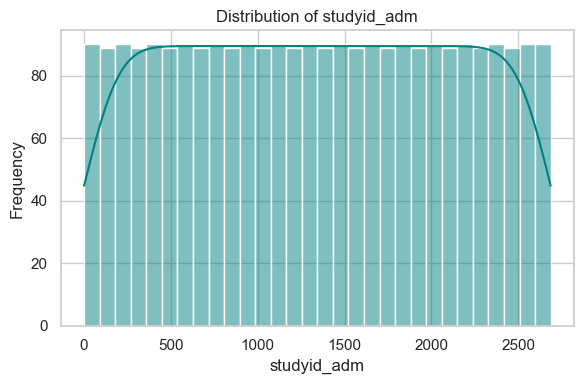

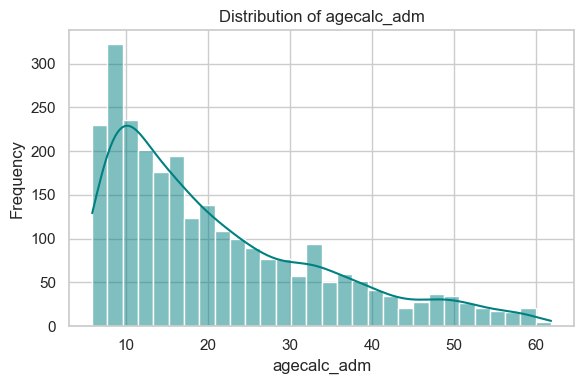

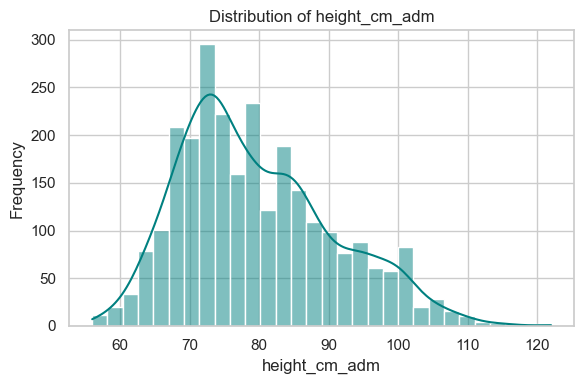

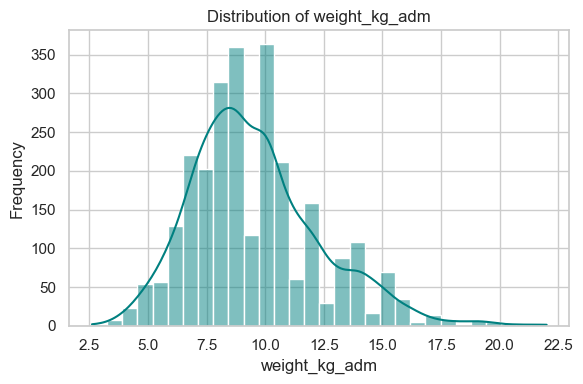

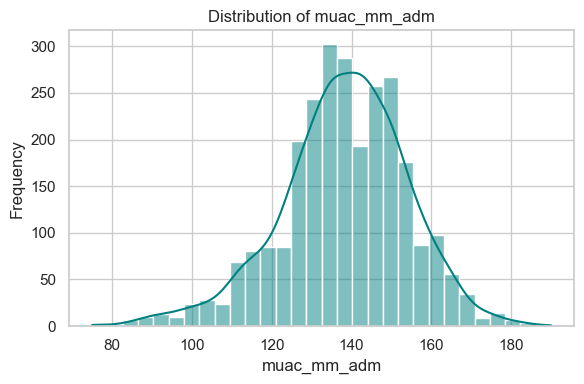

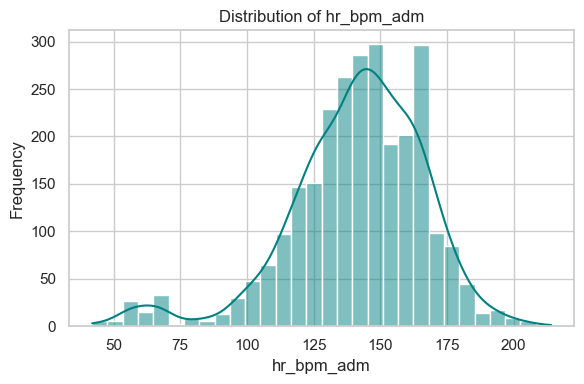

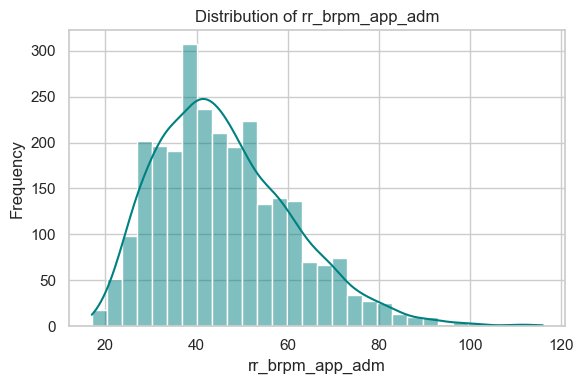

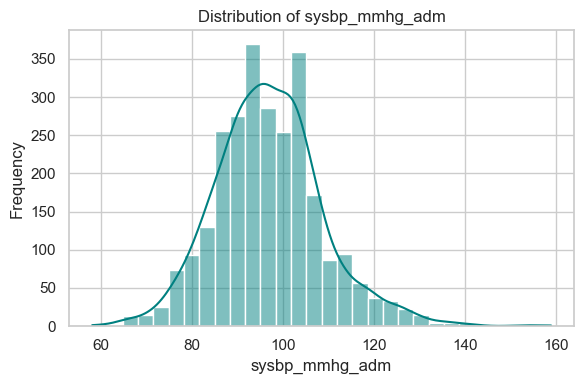

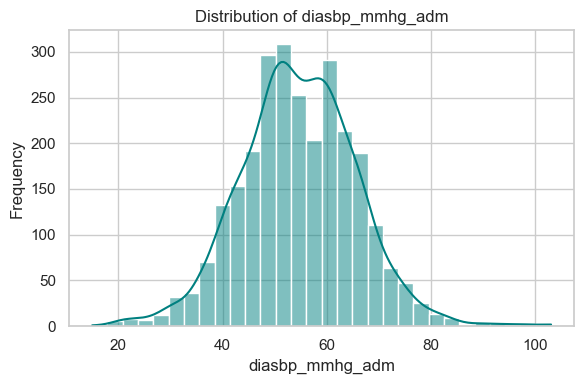

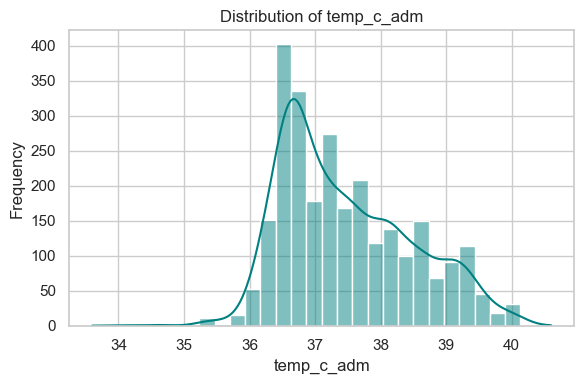

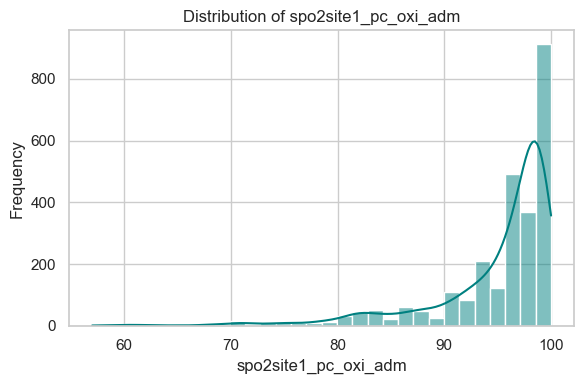

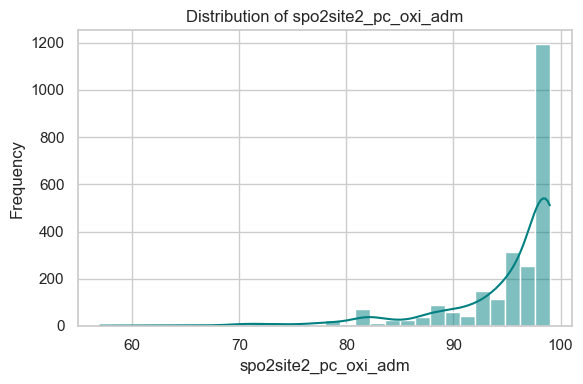

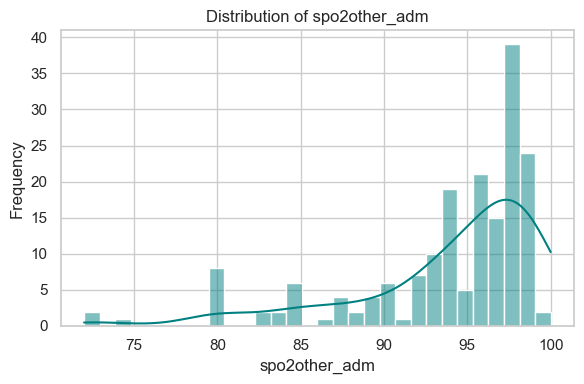

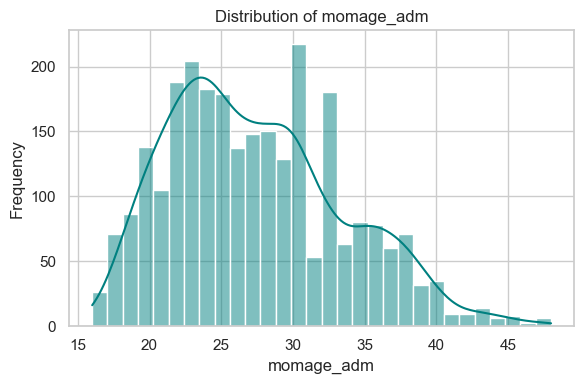

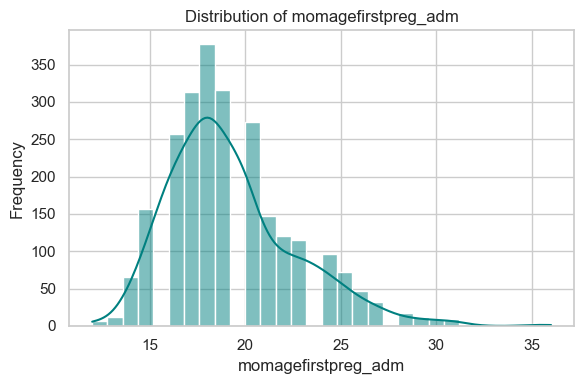

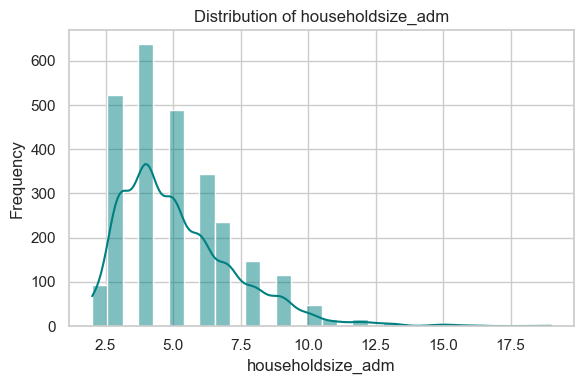

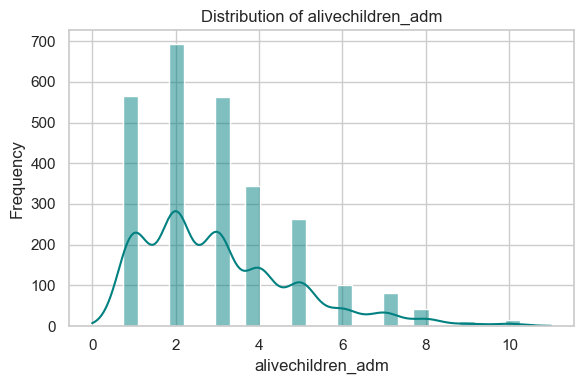

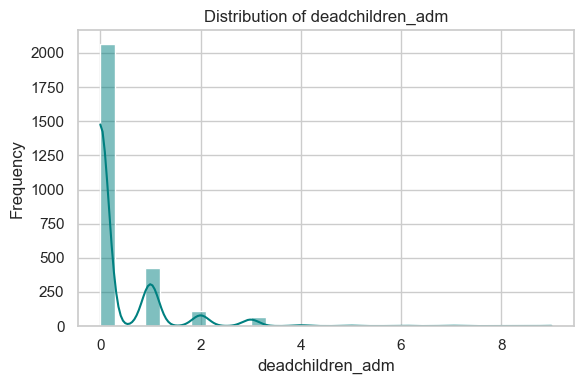

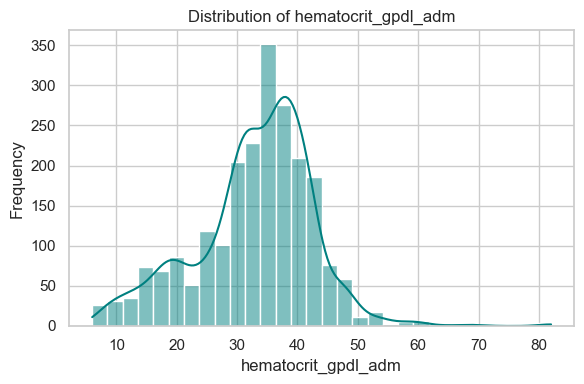

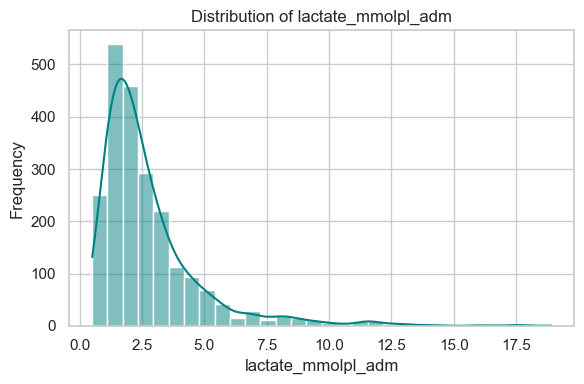

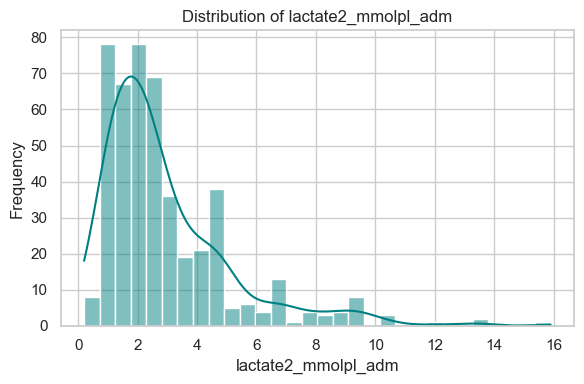

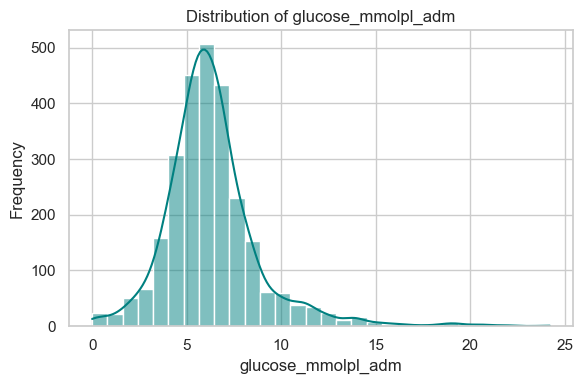

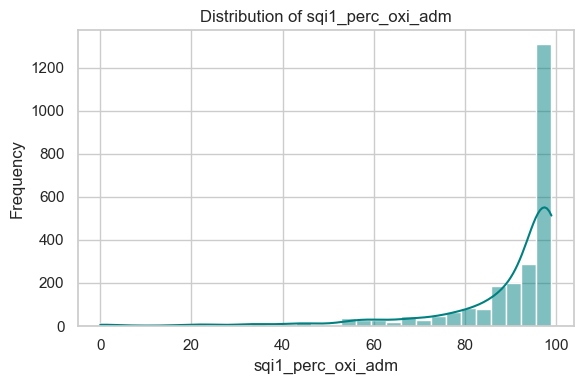

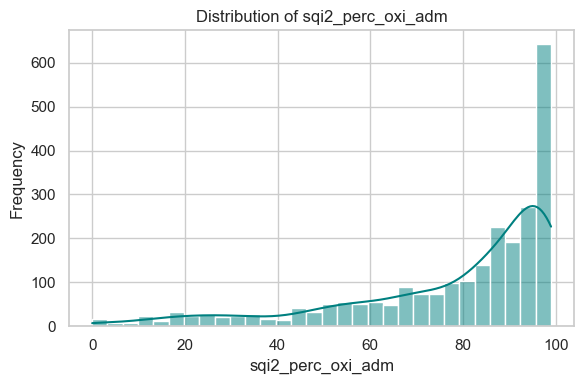

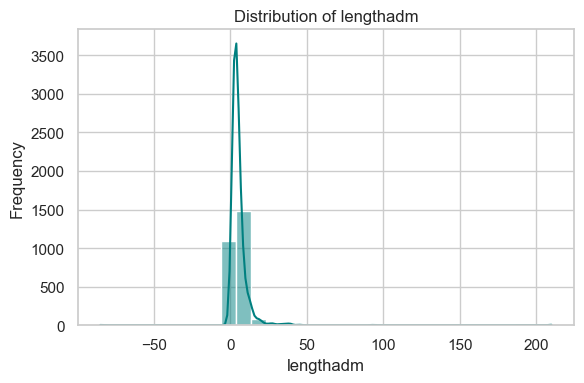

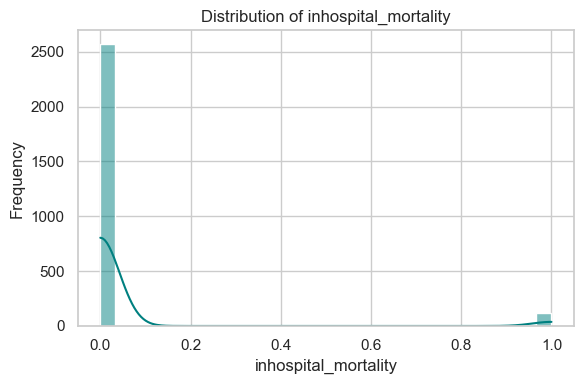

In [21]:
# Set a style
sns.set(style="whitegrid")

# Select numeric columns
num_cols = sepsis_df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(sepsis_df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


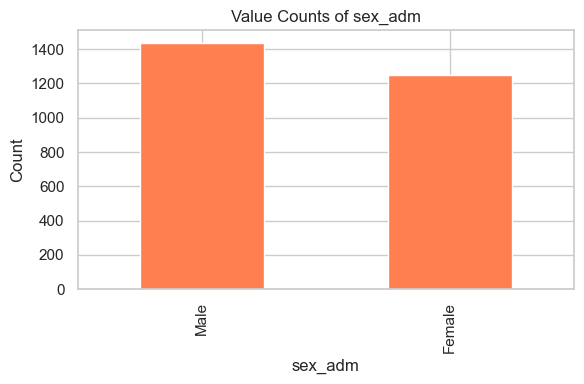

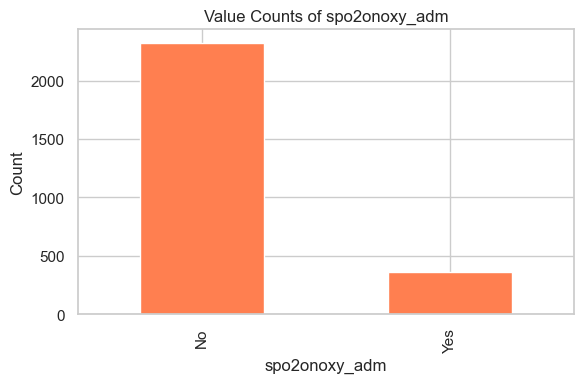

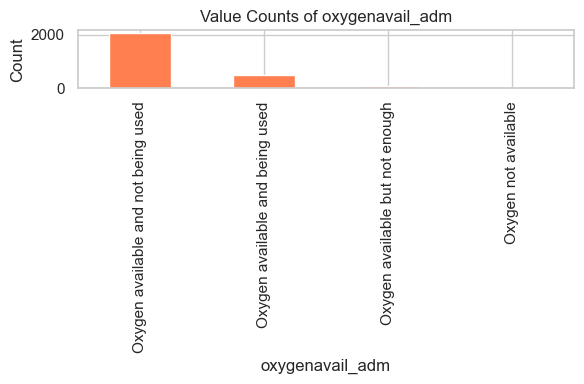

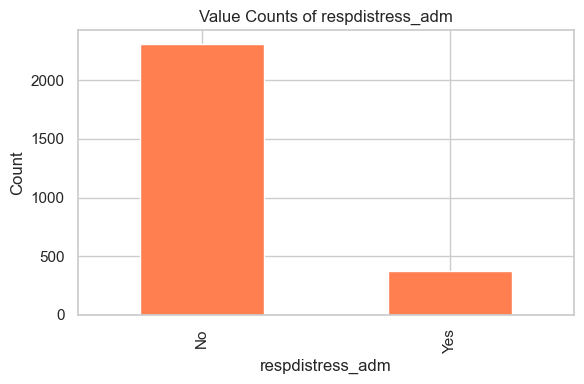

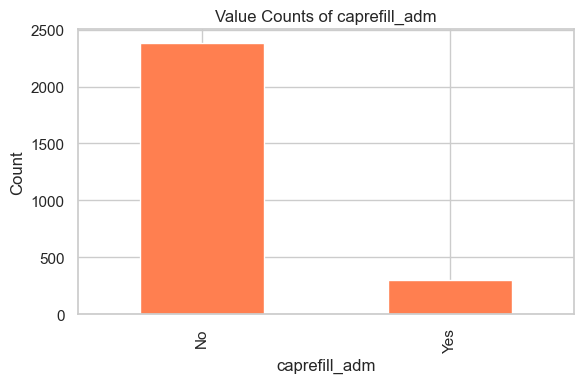

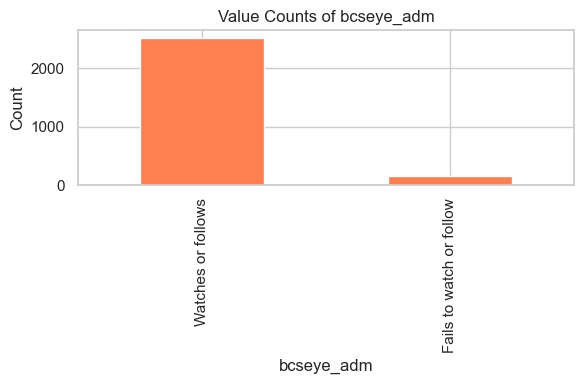

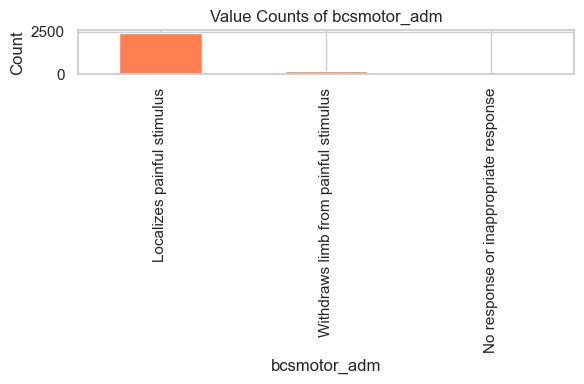

C:\Users\Hermela\AppData\Local\Temp\ipykernel_15664\43101538.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


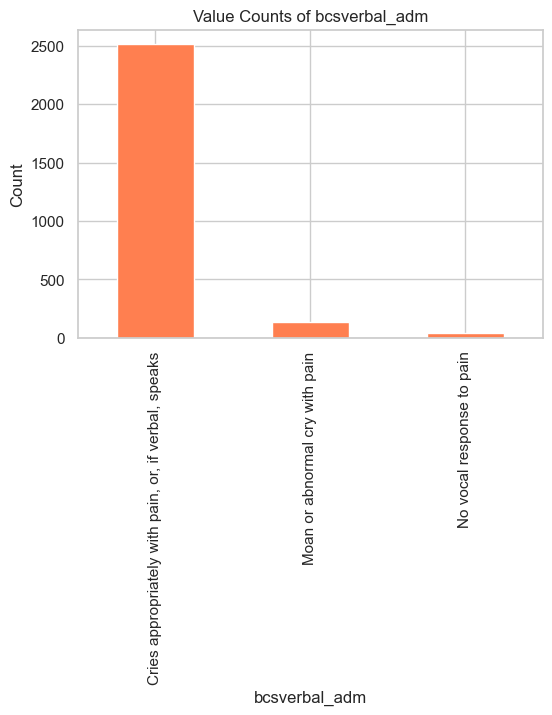

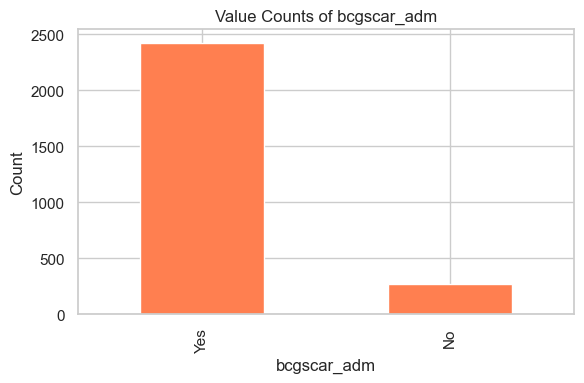

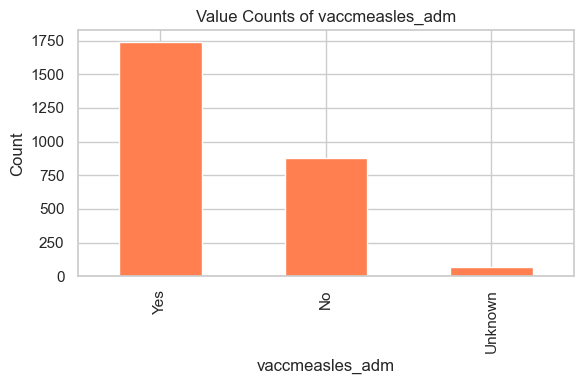

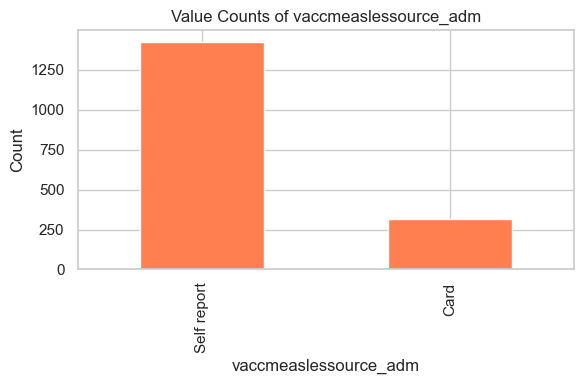

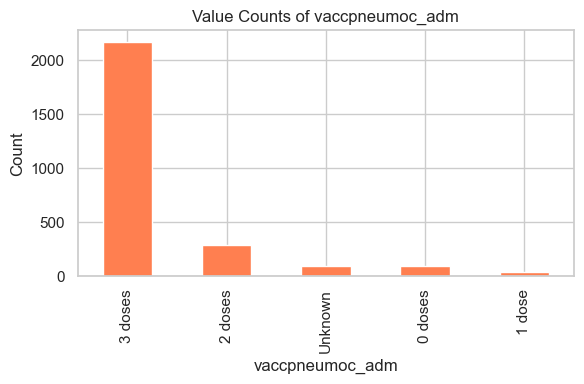

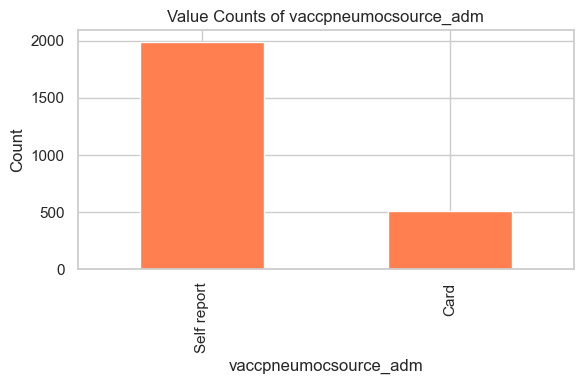

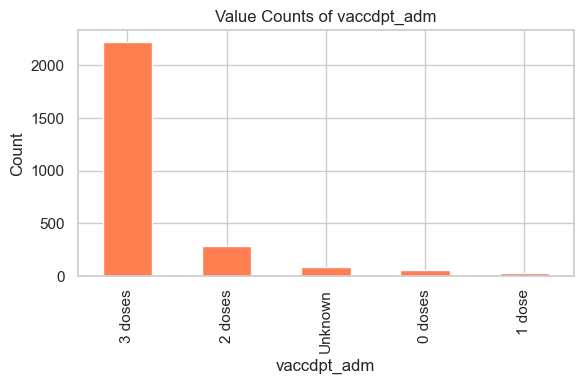

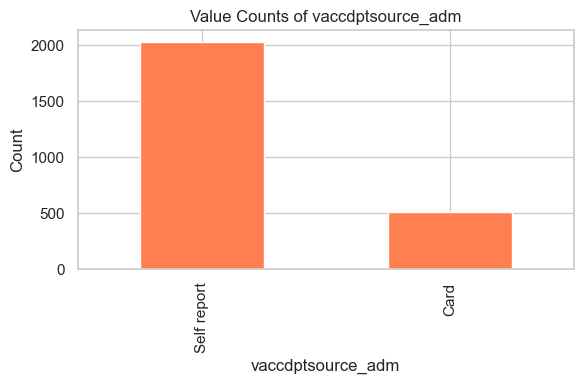

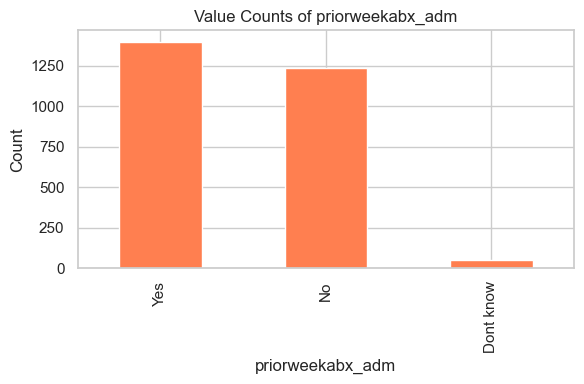

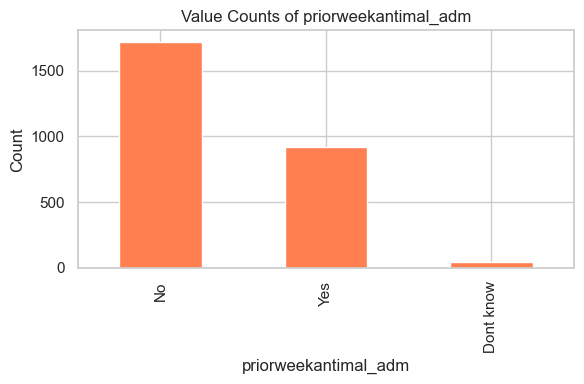

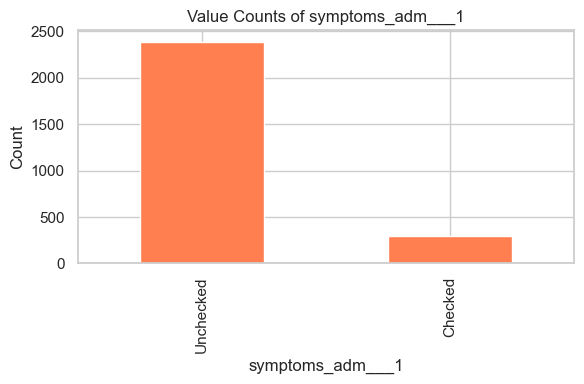

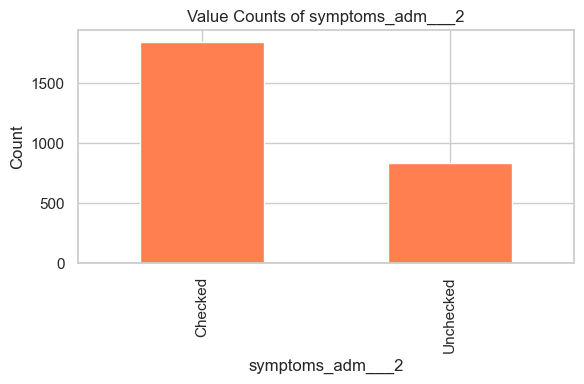

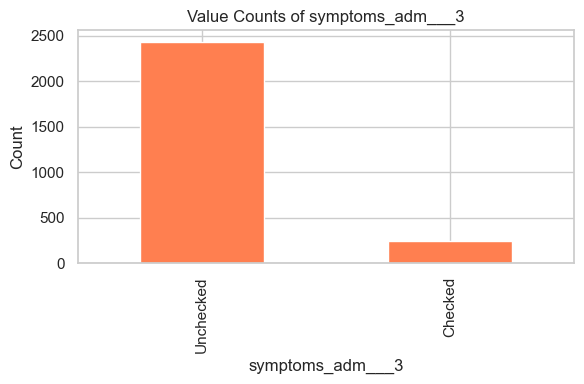

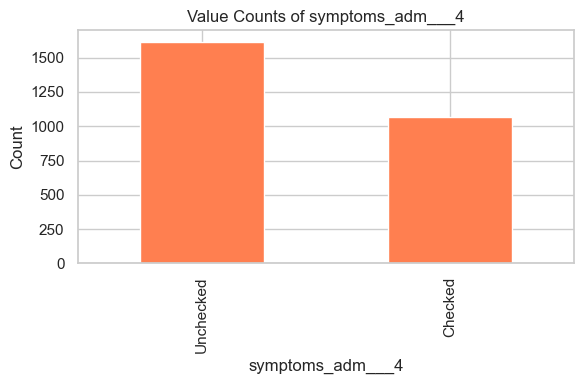

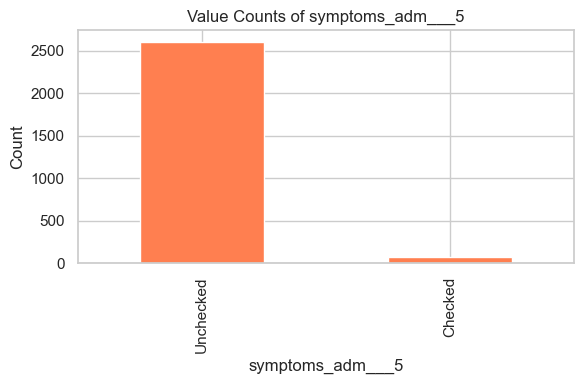

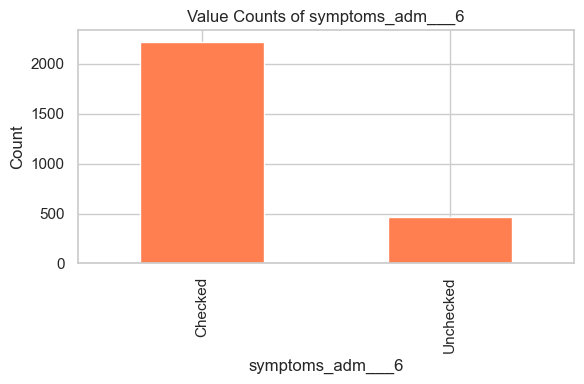

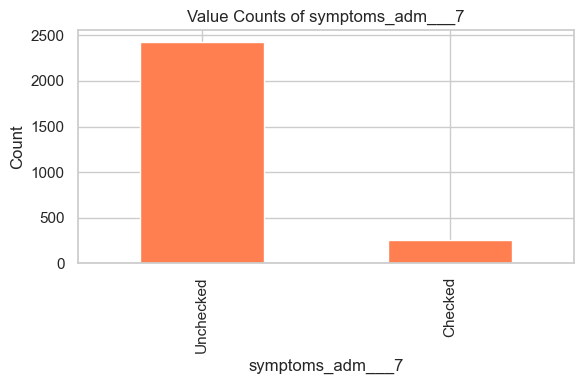

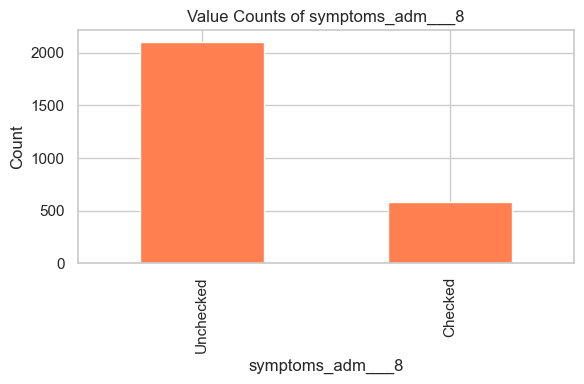

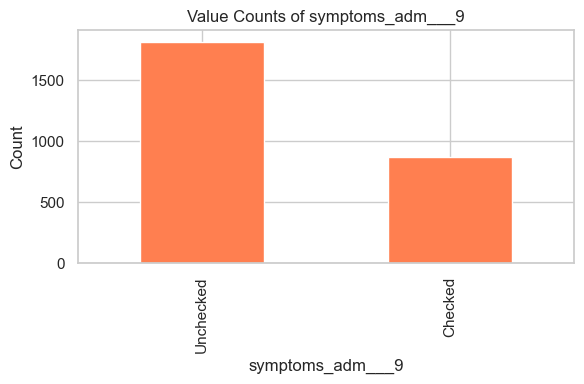

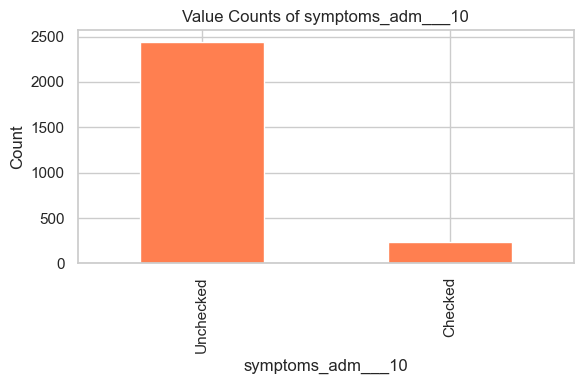

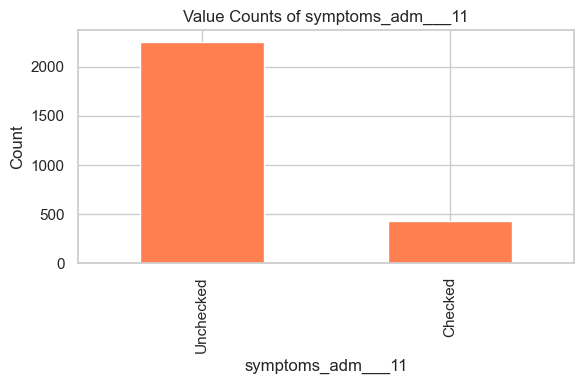

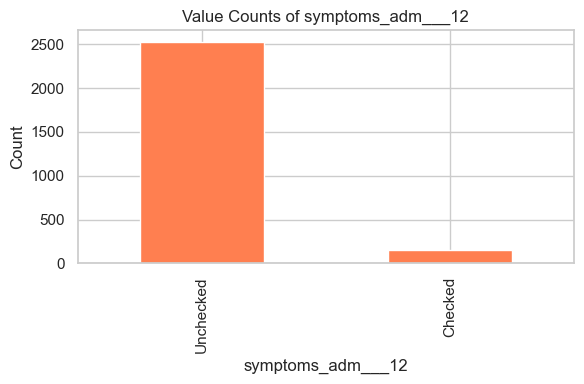

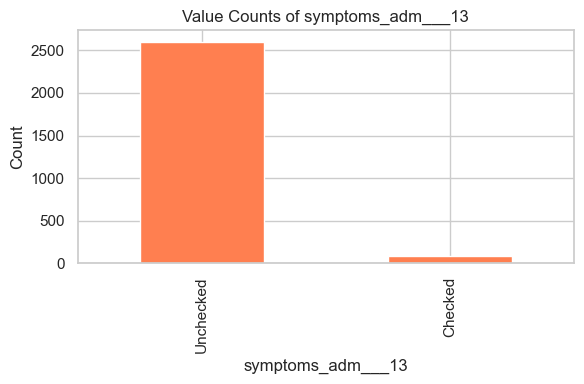

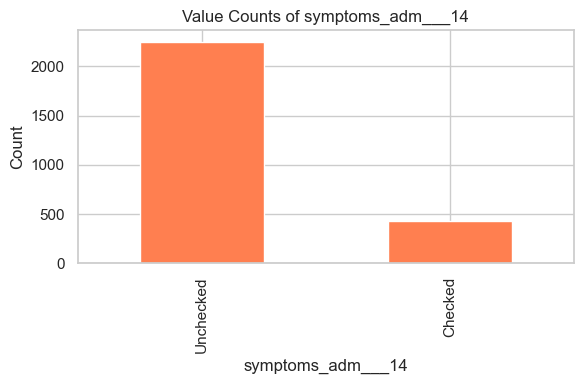

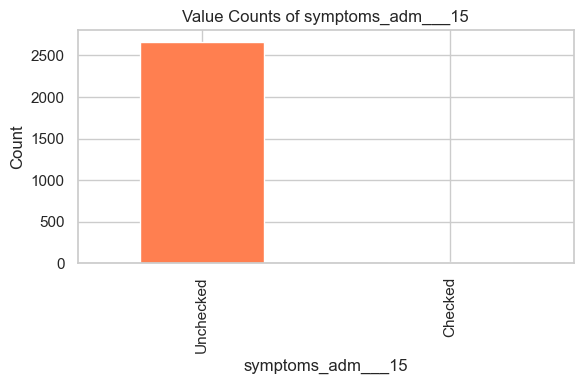

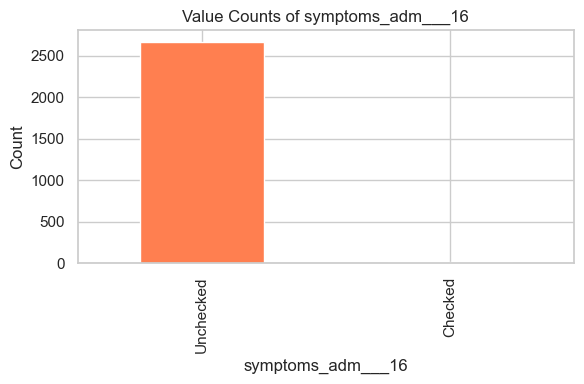

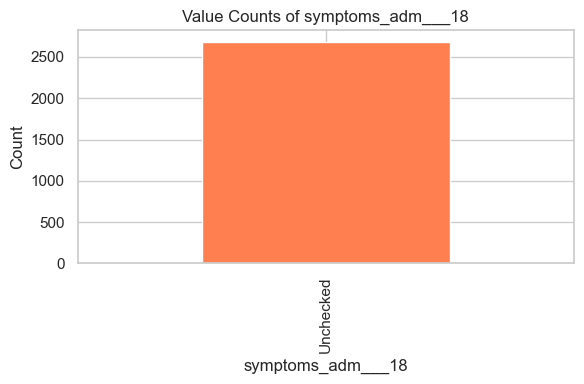

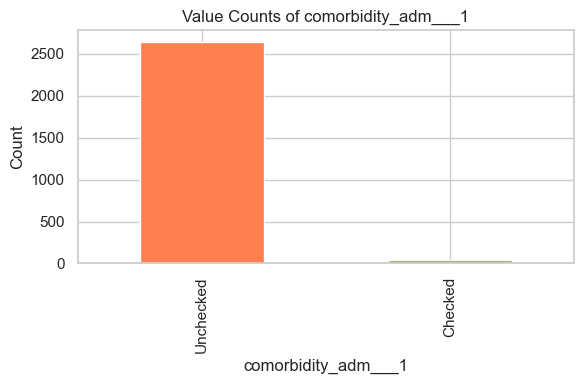

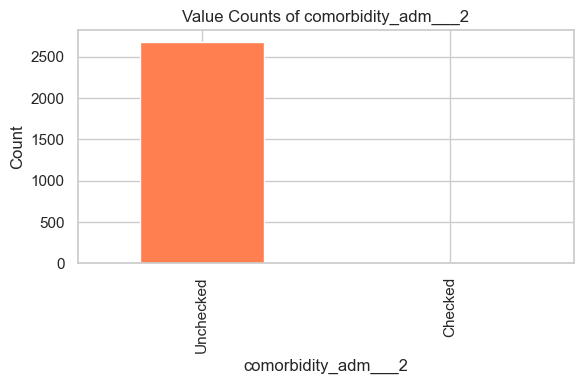

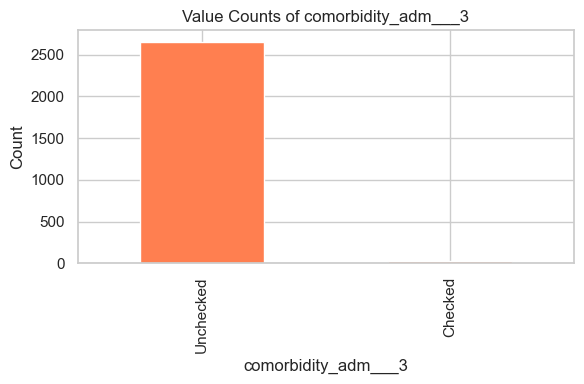

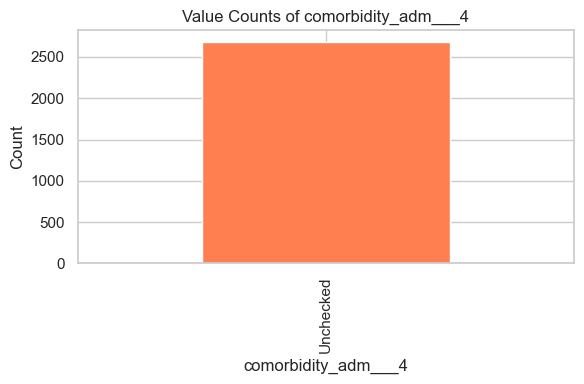

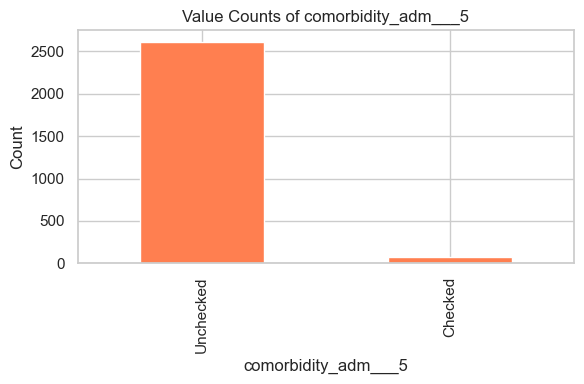

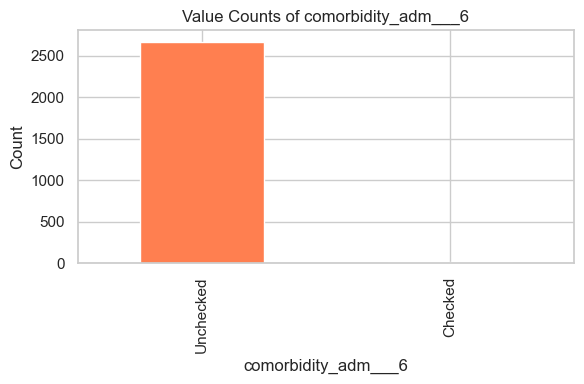

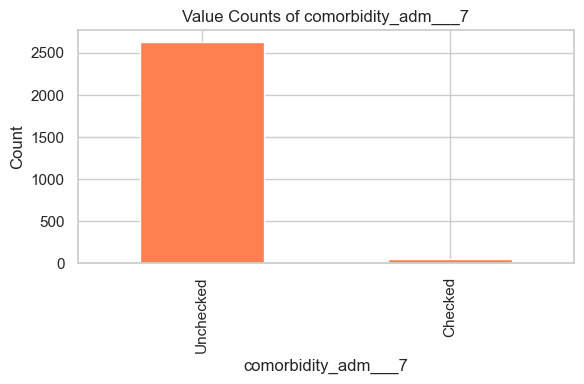

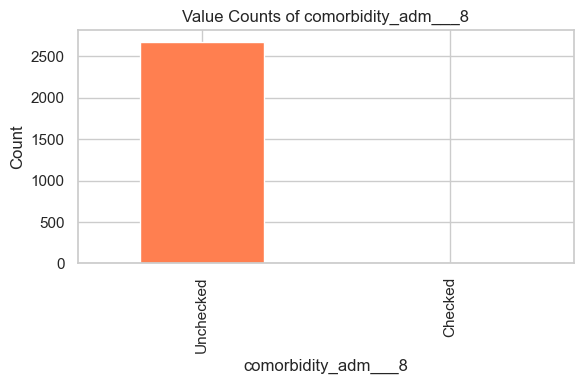

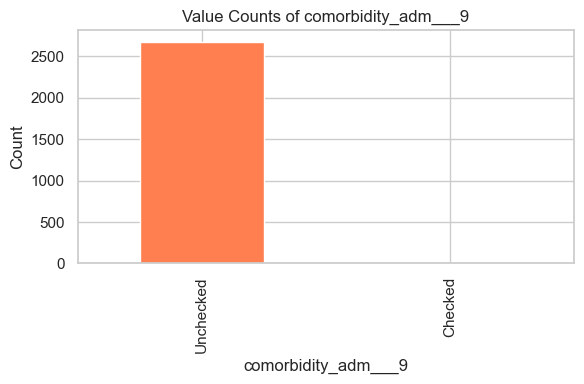

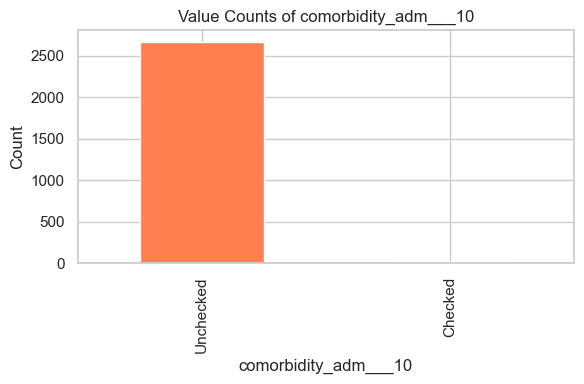

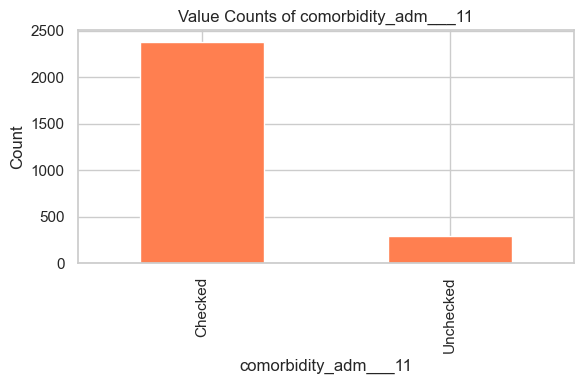

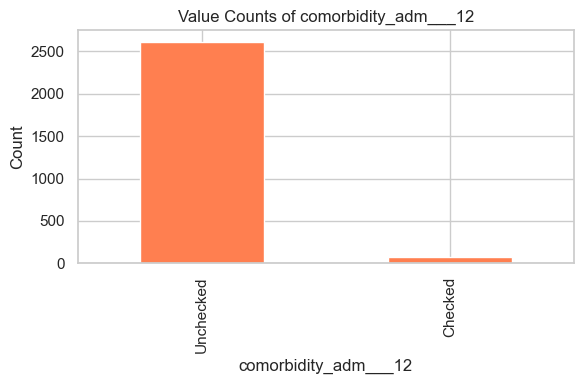

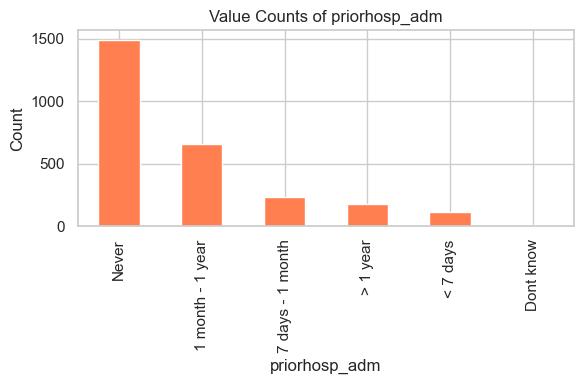

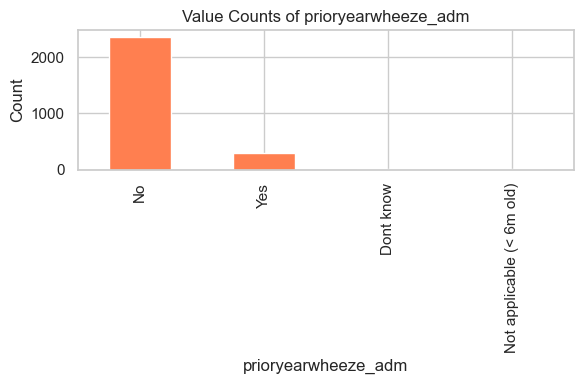

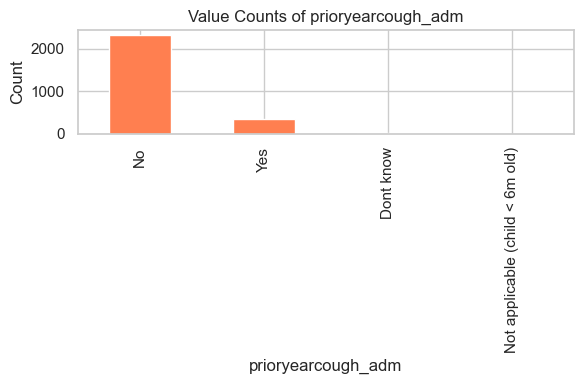

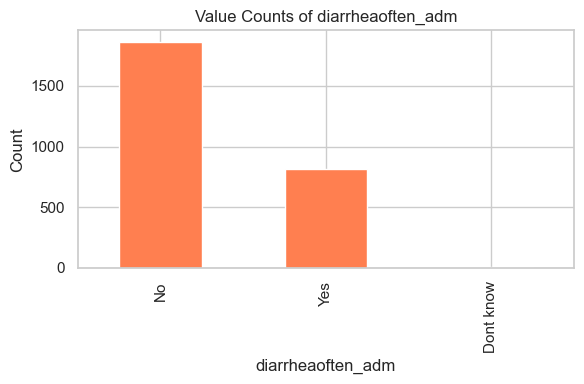

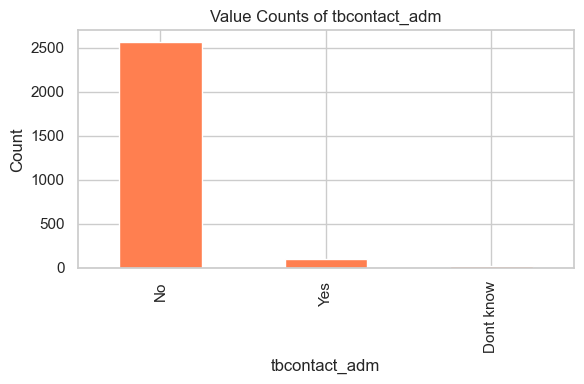

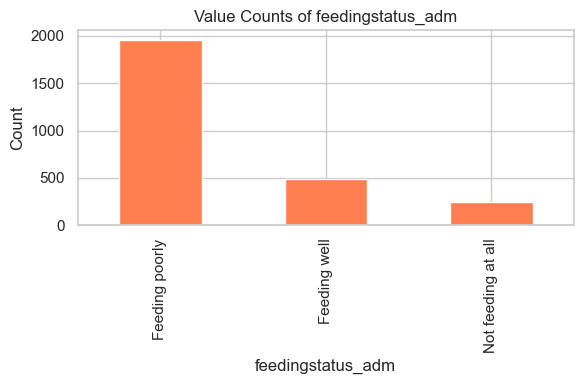

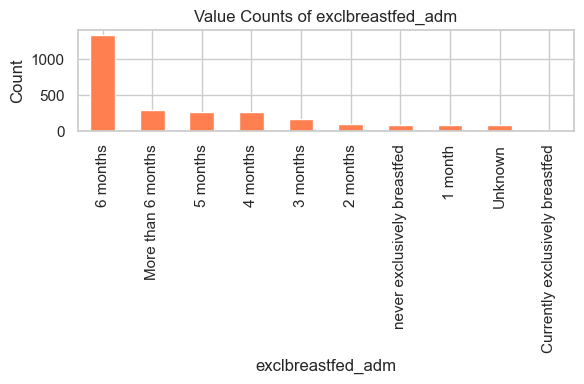

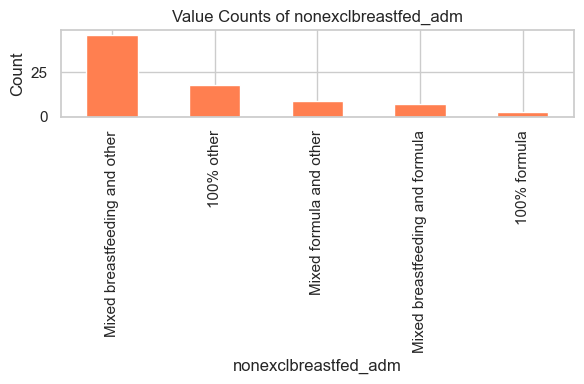

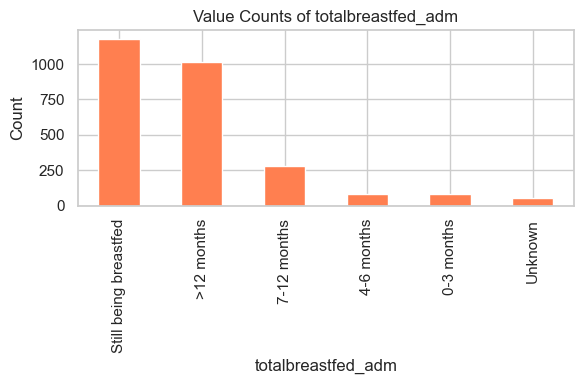

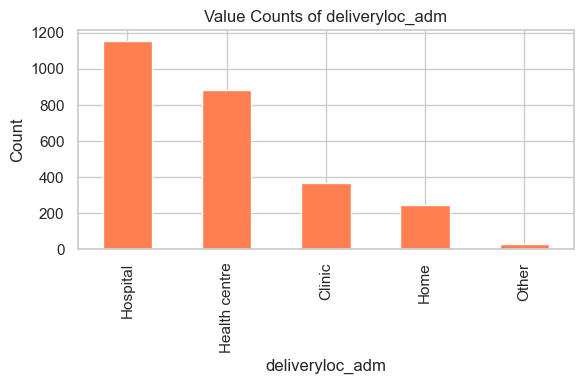

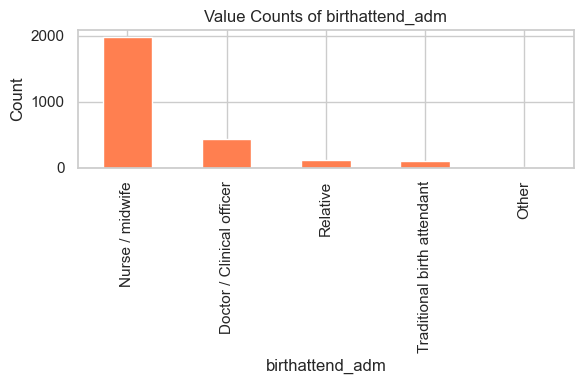

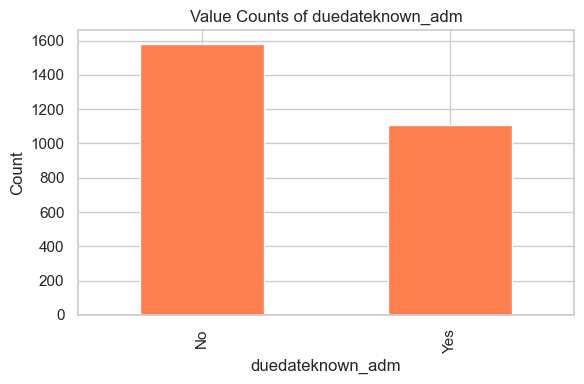

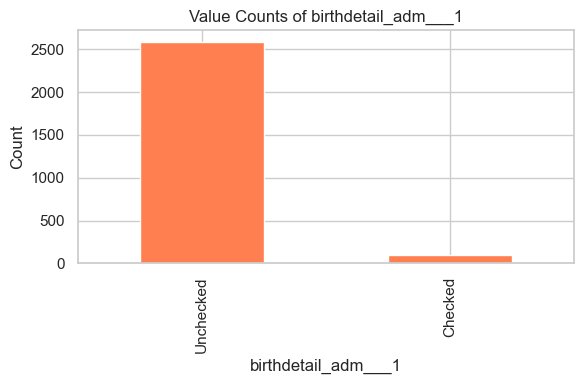

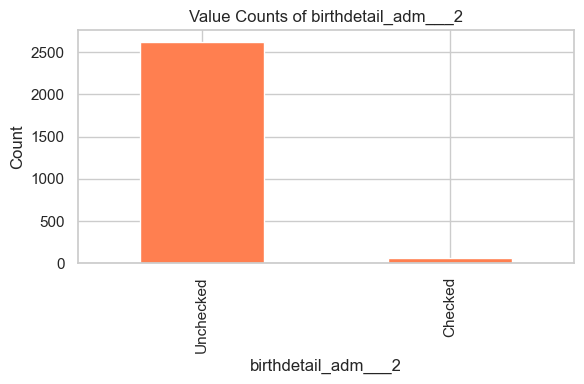

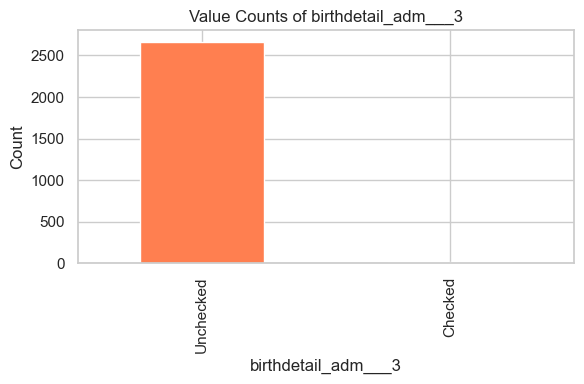

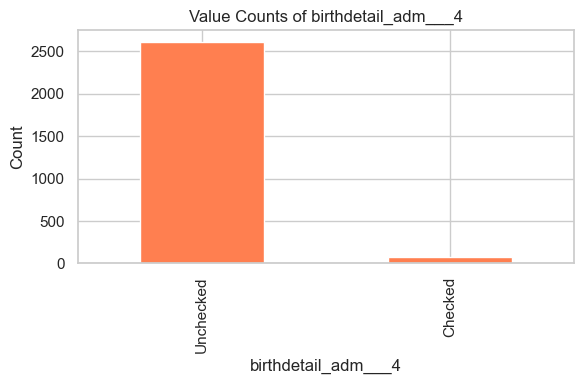

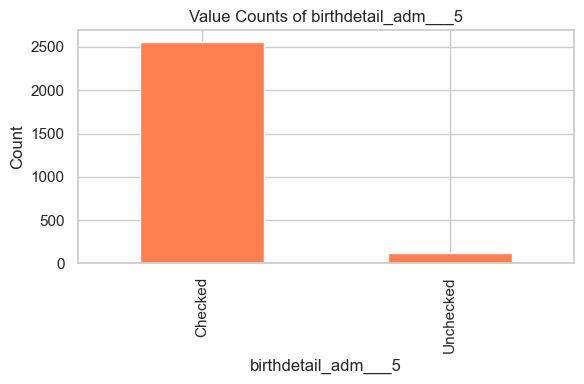

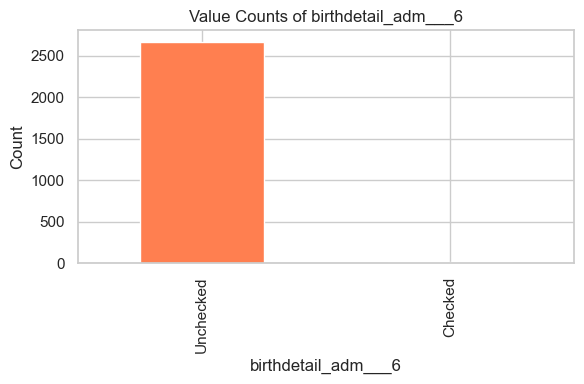

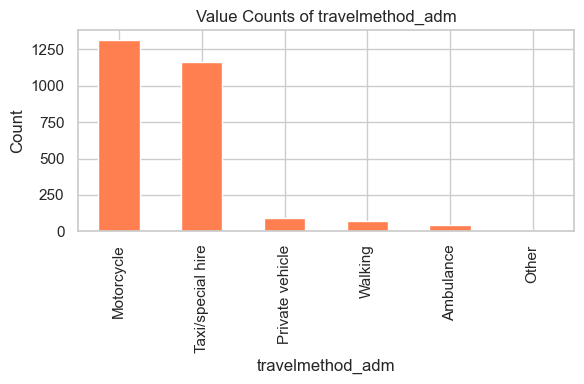

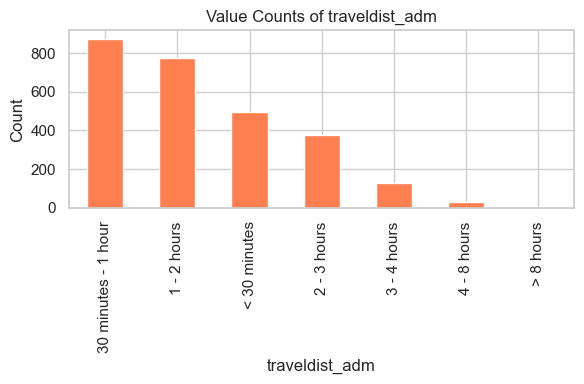

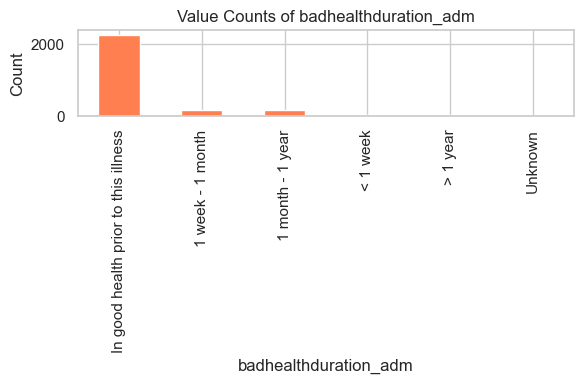

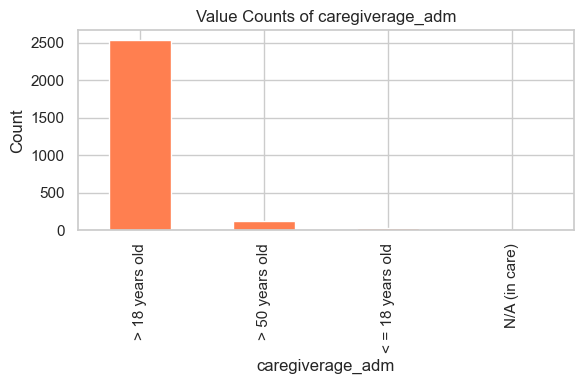

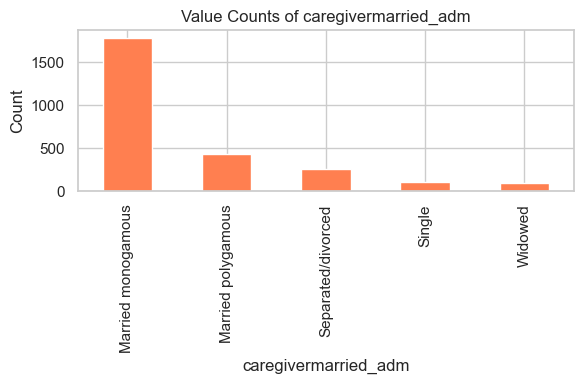

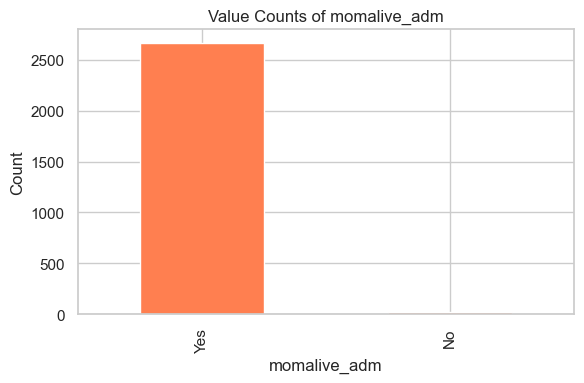

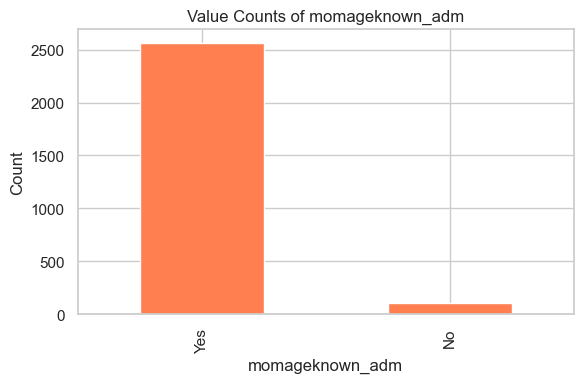

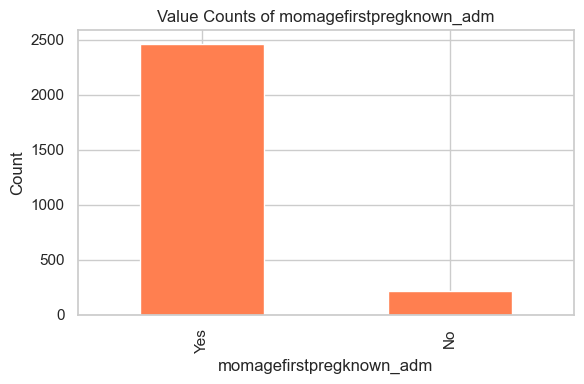

C:\Users\Hermela\AppData\Local\Temp\ipykernel_15664\43101538.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


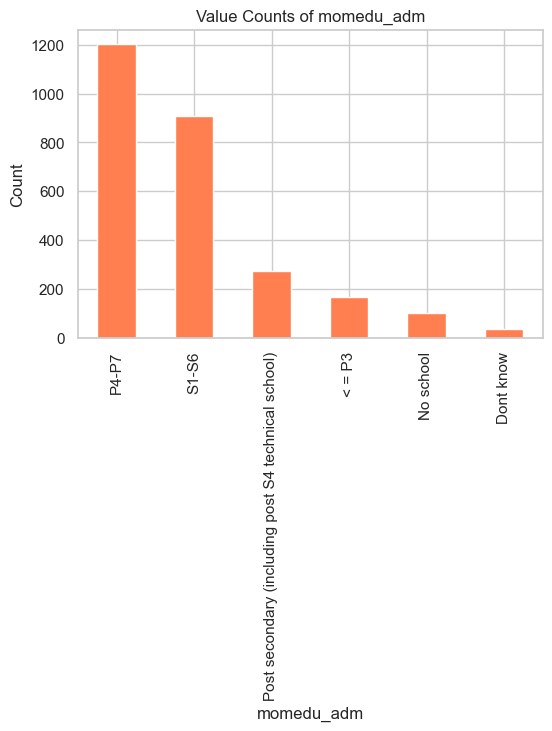

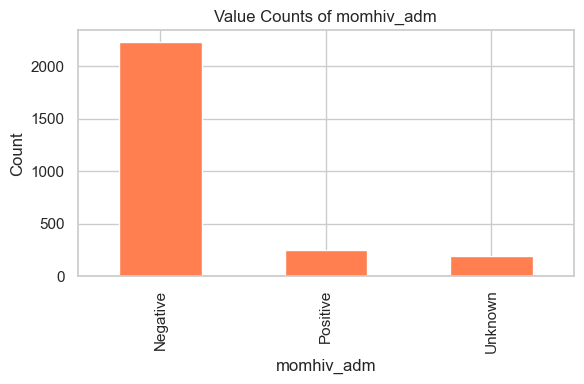

C:\Users\Hermela\AppData\Local\Temp\ipykernel_15664\43101538.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


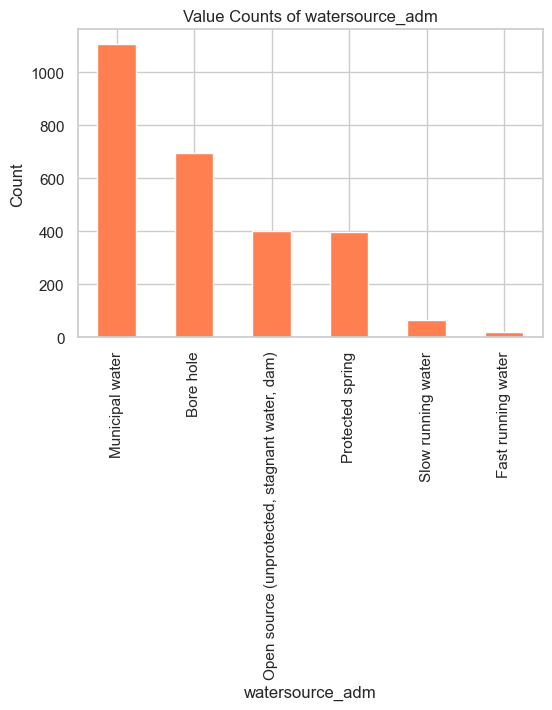

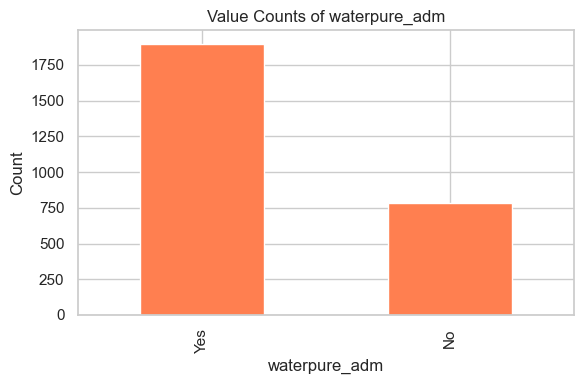

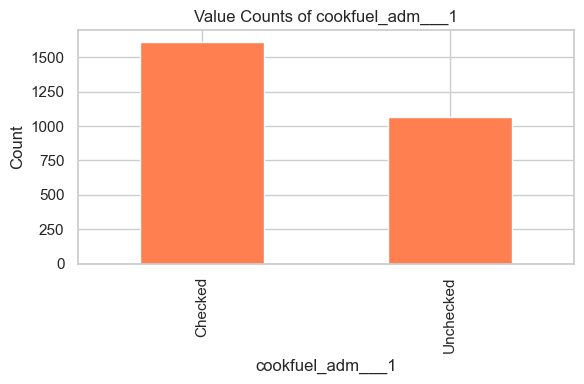

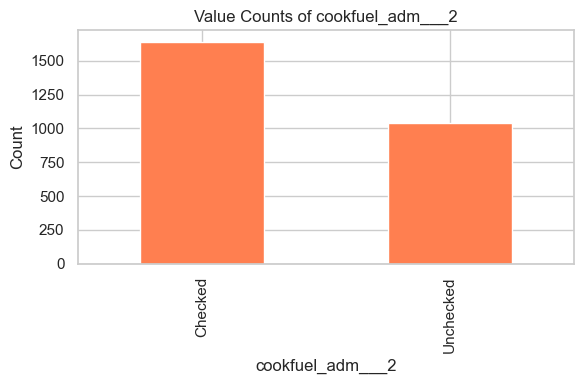

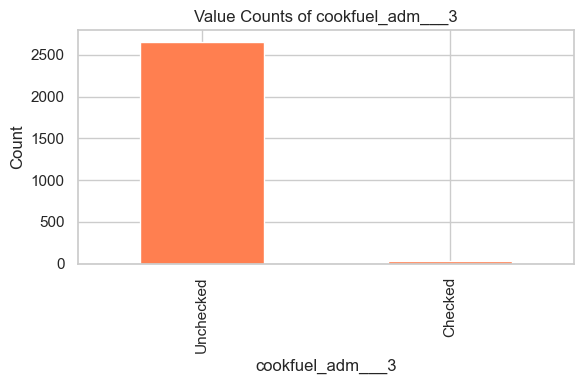

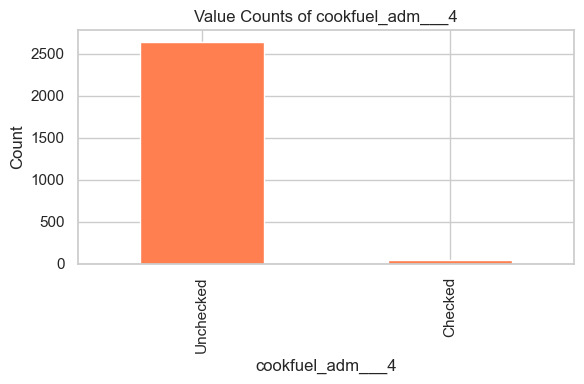

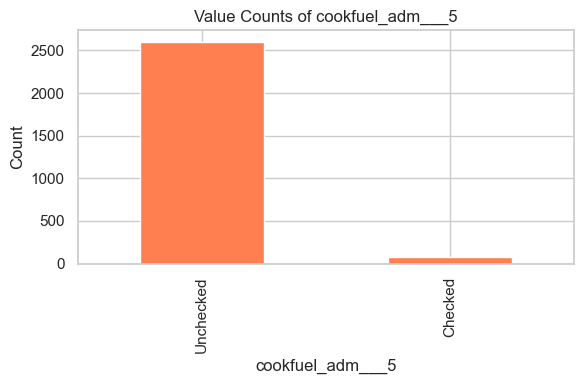

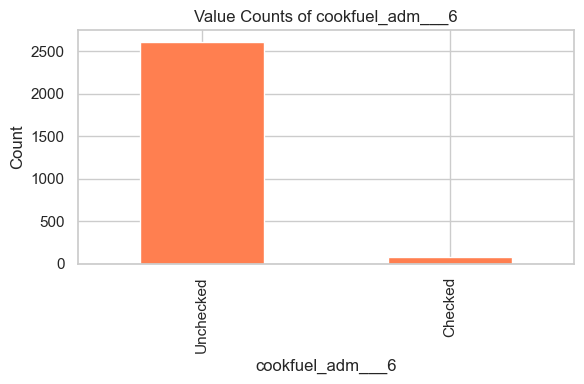

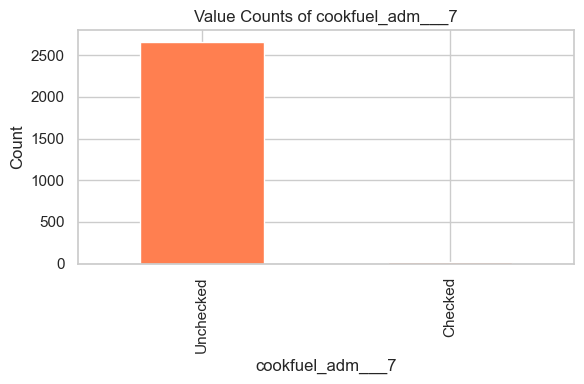

C:\Users\Hermela\AppData\Local\Temp\ipykernel_15664\43101538.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


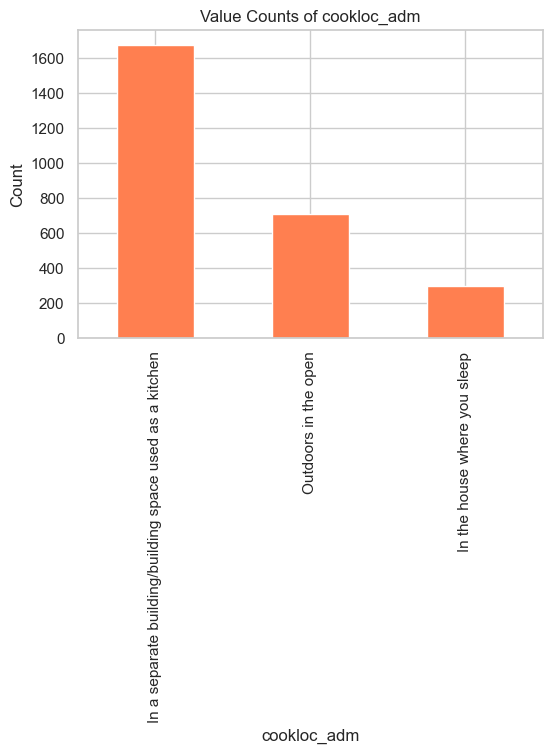

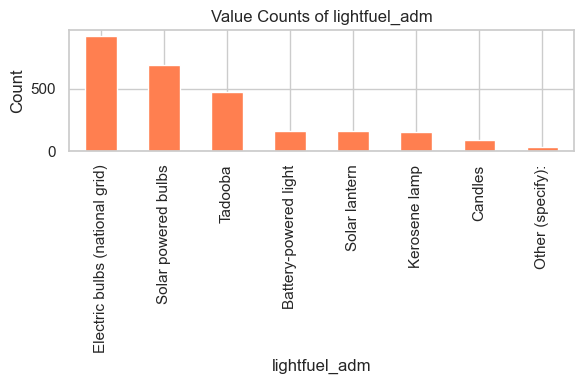

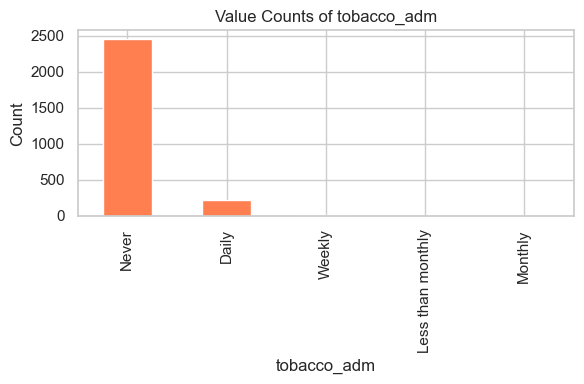

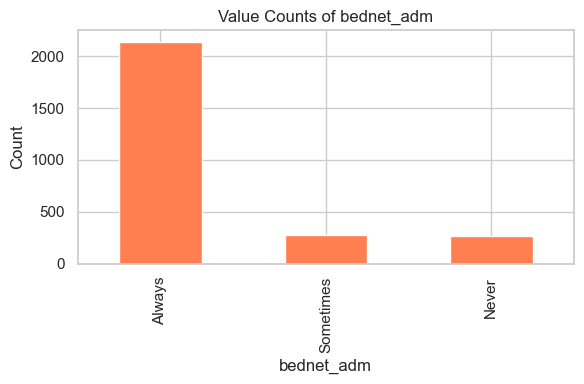

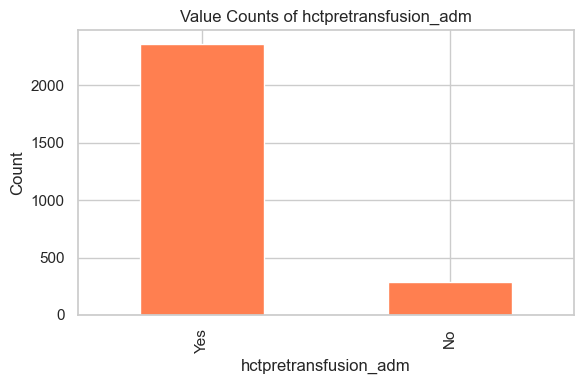

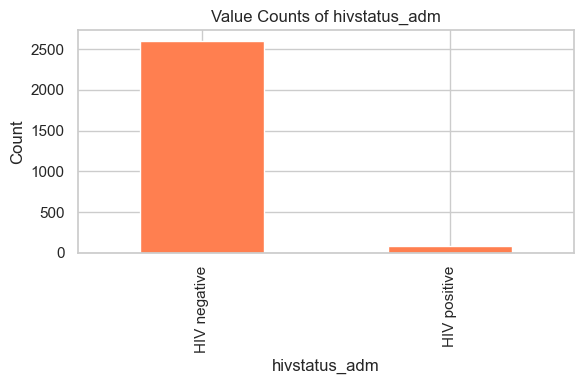

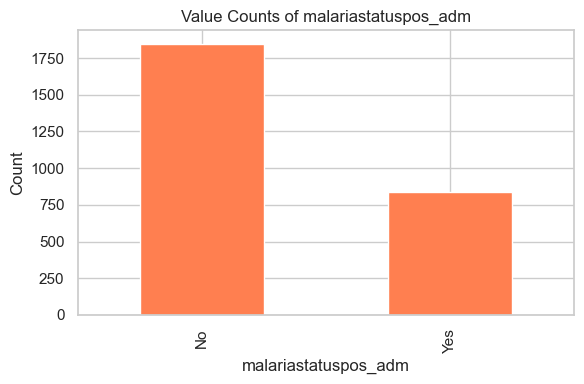

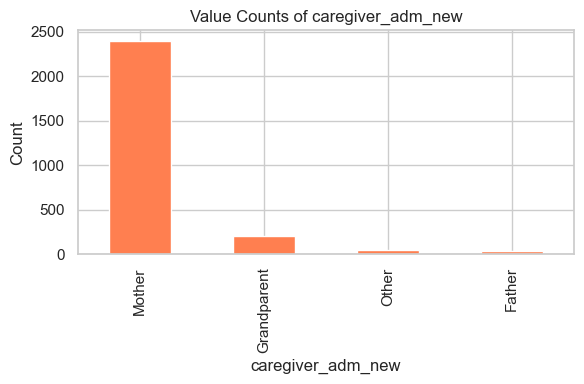

In [23]:
# Select categorical columns
cat_cols = sepsis_df.select_dtypes(include='object').columns

# Plot bar charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sepsis_df[col].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [27]:
# Calculate skewness and kurtosis
from scipy.stats import skew, kurtosis

for col in sepsis_df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col}: Skewness = {skew(sepsis_df[col].dropna()):.2f}, Kurtosis = {kurtosis(sepsis_df[col].dropna()):.2f}")


studyid_adm: Skewness = 0.00, Kurtosis = -1.20
agecalc_adm: Skewness = 1.04, Kurtosis = 0.27
height_cm_adm: Skewness = 0.60, Kurtosis = -0.15
weight_kg_adm: Skewness = 0.80, Kurtosis = 0.97
muac_mm_adm: Skewness = -0.42, Kurtosis = 0.63
hr_bpm_adm: Skewness = -0.89, Kurtosis = 1.66
rr_brpm_app_adm: Skewness = 0.76, Kurtosis = 0.64
sysbp_mmhg_adm: Skewness = 0.45, Kurtosis = 1.12
diasbp_mmhg_adm: Skewness = 0.10, Kurtosis = 0.77
temp_c_adm: Skewness = 0.52, Kurtosis = -0.36
spo2site1_pc_oxi_adm: Skewness = -2.41, Kurtosis = 6.89
spo2site2_pc_oxi_adm: Skewness = -2.37, Kurtosis = 6.57
spo2other_adm: Skewness = -1.64, Kurtosis = 2.41
momage_adm: Skewness = 0.56, Kurtosis = -0.24
momagefirstpreg_adm: Skewness = 0.96, Kurtosis = 1.24
householdsize_adm: Skewness = 1.25, Kurtosis = 2.41
alivechildren_adm: Skewness = 1.11, Kurtosis = 1.20
deadchildren_adm: Skewness = 3.66, Kurtosis = 20.69
hematocrit_gpdl_adm: Skewness = -0.21, Kurtosis = 1.26
lactate_mmolpl_adm: Skewness = 2.72, Kurtosis = 10